In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib.colors as mcolors
import anndata as ad
import seaborn as sns

In [2]:
# CLL-map tables - 
# import into your code as module with "import config_cllmap_tables"
# import config_cllmap_tables
# and then save the tables as variables, for example
# master_table = config_cllmap_tables.master_table

path = "/private/resources/"

# expression data
tpms_603samps_deseqLog10_batchcorr = pd.read_csv(path + "cll_tables/cllmap_rnaseq_tpms_603samps_deseqLog10_batchcorr.tsv", sep="\t")
cllmap_rnaseq_tpms_full = pd.read_csv(path + "cll_tables/cllmap_rnaseq_tpms_full.tsv", sep="\t")


In [3]:
cllmap_rnaseq_tpms_full.shape

(57242, 717)

In [5]:
df = cllmap_rnaseq_tpms_full

# The first two columns are used for `var`
var = df.iloc[:, :2].set_index('Description')

# The remaining columns are used for `obs`
obs = pd.DataFrame(index=df.columns[2:])

# The data matrix is the remaining part of the DataFrame, transposed
X = df.iloc[:, 2:].values.T

# Create the AnnData object with the data matrix, `obs`, and `var`
adata = sc.AnnData(X=X, obs=obs, var=var)

/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata

AnnData object with n_obs × n_vars = 715 × 57242
    var: 'Name'

In [7]:
descriptions_to_keep = [
    'TFEC', 'COL18A1', 'NRIP1', 'SLC19A1', 'KCNH2', 'SEPT10', 'LDOC1', 'LPL', 'KANK2', 'SOWAHC', 'DUSP26', 'WNT9A', 
    'OSBPL5', 'EML6', 'HCK', 'CD1C', 'VPS37B', 'CYBB', 'NXPH4', 'BTNL9', 'IQSEC1', 'BANK1', 'KLRK1', 'ACSM3', 'PHF16', 
    'TOX2', 'SESN3', 'BCL7A', 'ITGB5', 'TSPAN13', 'PPP1R9A', 'SLC12A7', 'SSBP3', 'SPG20', 'VASH1', 'IL13RA1', 'SDC3', 
    'MS4A4E', 'MYL9', 'NT5E', 'MS4A6A', 'PITPNC1', 'CNTNAP2', 'WNT3', 'CLDN7', 'TCF7', 'MYBL1', 'NUGGC', 'GRIK3', 
    'FCER1G', 'STK32B', 'GADD45A', 'ARRDC5', 'P2RX1', 'C1orf162', 'BEX4', 'APP', 'AKT3', 'COBLL1', 'MNDA', 'FCRL3', 
    'FAM49A', 'FCRL2', 'SLC2A3', 'SH3D21', 'FMOD', 'LEF1', 'SEMA4A', 'CTLA4', 'ADTRP', 'IGSF3', 'PDGFD', 'APOD', 
    'TOX2', 'MYLIP', 'PIP5K1B', 'TBC1D9', 'SIK1', 'DUSP5', 'HIVEP3', 'GPR183', 'PITPNC1', 'HRK', 'TUBG2', 'ZNF804A', 
    'BASP1', 'FLJ20373', 'MAP4K4', 'LRRK2', 'SAMSN1', 'CEACAM1', 'PHF16', 'TNFRSF13B', 'MID1IP1', 'ABCA9', 'AEBP1', 
    'HIP1R', 'RIMKLB', 'LATS2', 'EML6', 'FADS3', 'MBOAT1', 'DCLK2', 'LCN10', 'ITGAX', 'ZMAT1'
]

print(len(descriptions_to_keep))

# Find duplicates
duplicates = [item for item in set(descriptions_to_keep) if descriptions_to_keep.count(item) > 1]

# Print duplicates
print("Duplicates:", duplicates)

# Filter the var DataFrame to retain only the rows with the desired descriptions
filtered_var = adata.var[adata.var.index.isin(descriptions_to_keep)]

# Subset the AnnData object using the filtered var DataFrame
adata_filtered = adata[:, adata.var.index.isin(descriptions_to_keep)]

106
Duplicates: ['PHF16', 'TOX2', 'EML6', 'PITPNC1']


In [8]:
master_table = pd.read_csv(path + "cll_tables/cllmap_master_table.20220622.tsv", sep="\t")

In [9]:
ec_table = master_table[["participant_id", "ec_name"]]

In [10]:
ec_table

,participant_id,ec_name
0,CRC-0001,EC-u1
1,CRC-0002,EC-u1
2,CRC-0003,EC-u2
3,CRC-0004,EC-m4
4,CRC-0005,EC-u2
...,...,...
1171,MBL5,NaN
1172,MBL6,NaN
1173,MBL7,NaN
1174,MBL8,NaN


In [11]:
ec_table = ec_table[ec_table['participant_id'].isin(adata_filtered.obs.index)]

In [12]:
ec_table

,participant_id,ec_name
0,CRC-0001,EC-u1
1,CRC-0002,EC-u1
2,CRC-0003,EC-u2
3,CRC-0004,EC-m4
4,CRC-0005,EC-u2
...,...,...
1148,SCLL-0501,NaN
1149,SCLL-0502,EC-m4
1150,SCLL-0503,EC-m1
1151,SCLL-0504,EC-u1


In [13]:

filtered_ec_table = ec_table[ec_table['participant_id'].isin(adata_filtered.obs.index)]
filtered_ec_table = filtered_ec_table.dropna(subset=['ec_name'])
adata_filtered = adata_filtered[filtered_ec_table['participant_id'].values].copy()

print(filtered_ec_table)



# Define a function to split the AnnData object based on EC type
def split_anndata_by_ec(adata, ec_table):
    ec_types = ec_table['ec_name'].dropna().unique()  # Get unique EC types
    adata_dict = {}  # Dictionary to store the split AnnData objects

    for ec_type in ec_types:
        samples = ec_table[ec_table['ec_name'] == ec_type]['participant_id']
        adata_subset = adata[samples, :].copy()  # Subset AnnData based on sampleIDs
        adata_dict[ec_type] = adata_subset

    return adata_dict

# Split the filtered AnnData object
adata_dict = split_anndata_by_ec(adata_filtered, filtered_ec_table)

# Verify the split AnnData objects
for ec_type, adata_subset in adata_dict.items():
    print(f"EC Type: {ec_type}, Shape: {adata_subset.shape}")

     participant_id ec_name
0          CRC-0001   EC-u1
1          CRC-0002   EC-u1
2          CRC-0003   EC-u2
3          CRC-0004   EC-m4
4          CRC-0005   EC-u2
...             ...     ...
1146      SCLL-0499   EC-m1
1149      SCLL-0502   EC-m4
1150      SCLL-0503   EC-m1
1151      SCLL-0504   EC-u1
1152      SCLL-0505   EC-u2

[603 rows x 2 columns]
EC Type: EC-u1, Shape: (188, 102)
EC Type: EC-u2, Shape: (64, 102)
EC Type: EC-m4, Shape: (113, 102)
EC Type: EC-m3, Shape: (54, 102)
EC Type: EC-i, Shape: (62, 102)
EC Type: EC-o, Shape: (21, 102)
EC Type: EC-m1, Shape: (53, 102)
EC Type: EC-m2, Shape: (48, 102)


In [14]:
import numpy as np
adata_avg_dict = {}

for ec_type, adata_subset in adata_dict.items():
    avg_expression = np.mean(adata_subset.X, axis=0)  # Calculate the average expression for each gene
    avg_expression = avg_expression.reshape(1, -1)  # Reshape to keep 2D structure
    adata_avg = sc.AnnData(X=avg_expression, var=adata_subset.var.copy())  # Create a new AnnData object
    adata_avg.obs['ec_name'] = [ec_type]  # Add EC type to obs
    adata_avg_dict[ec_type] = adata_avg

# Combine the individual AnnData objects into one
adata_combined = sc.concat(adata_avg_dict.values(), join='outer', merge='same')

# Verify the combined AnnData object
print(adata_combined.X)

[[6.36118939e+00 3.11151636e+01 3.66196496e+00 8.22129859e+00
  8.01031409e+00 1.04393787e+01 2.88928518e+01 2.44820580e+01
  3.34417850e+01 9.12423094e+01 1.95337344e+02 9.12811088e+00
  1.56838960e+01 1.45214278e+01 3.00744371e+02 1.00291570e+01
  5.91930622e+00 1.18154714e+01 7.69288689e+00 3.51819112e+01
  2.22416232e+01 1.75431158e+01 9.98517602e+00 1.07794368e+01
  3.68364009e+00 2.35119750e+02 2.46563076e+01 4.10909959e+00
  3.60966729e+01 7.80773831e+00 4.28462635e+01 8.68901766e+01
  8.93598797e+01 4.42493795e+01 4.20815804e+00 2.01895855e+01
  1.40662470e+01 9.41403535e+00 1.07159730e+02 1.00178229e+02
  4.38236723e+01 3.85314859e+00 1.08282472e+01 5.93119022e+01
  7.92914891e+00 2.20370245e+00 1.14078678e+01 1.14057191e+01
  1.88807367e+01 2.14875302e+00 6.85794281e+00 4.57125836e+00
  7.48936957e+00 2.86386360e+01 8.15952739e+01 9.89712011e+00
  6.97611518e+00 1.57643197e+01 5.31560964e+01 6.65706223e+01
  1.70099525e+01 2.93921251e+01 2.07982131e+01 1.47870923e+01
  2.9388

/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Average TPM values:
Description
SDC3        2.554940
SH3D21     25.169296
GRIK3       6.629589
HIVEP3      5.654279
SSBP3      10.587626
             ...    
PHF16      42.328089
ZMAT1      52.041256
BEX4       72.455185
IL13RA1     8.995195
LDOC1       5.407129
Length: 102, dtype: float64
Filtered genes (should be >= 1 TPM):
Index(['SDC3', 'SH3D21', 'GRIK3', 'HIVEP3', 'SSBP3', 'GADD45A', 'C1orf162',
       'IGSF3', 'SEMA4A', 'FCRL3',
       ...
       'SIK1', 'COL18A1', 'SLC19A1', 'CYBB', 'MID1IP1', 'PHF16', 'ZMAT1',
       'BEX4', 'IL13RA1', 'LDOC1'],
      dtype='object', name='Description', length=102)
Number of genes before filtering: 102
Number of genes after filtering: 102


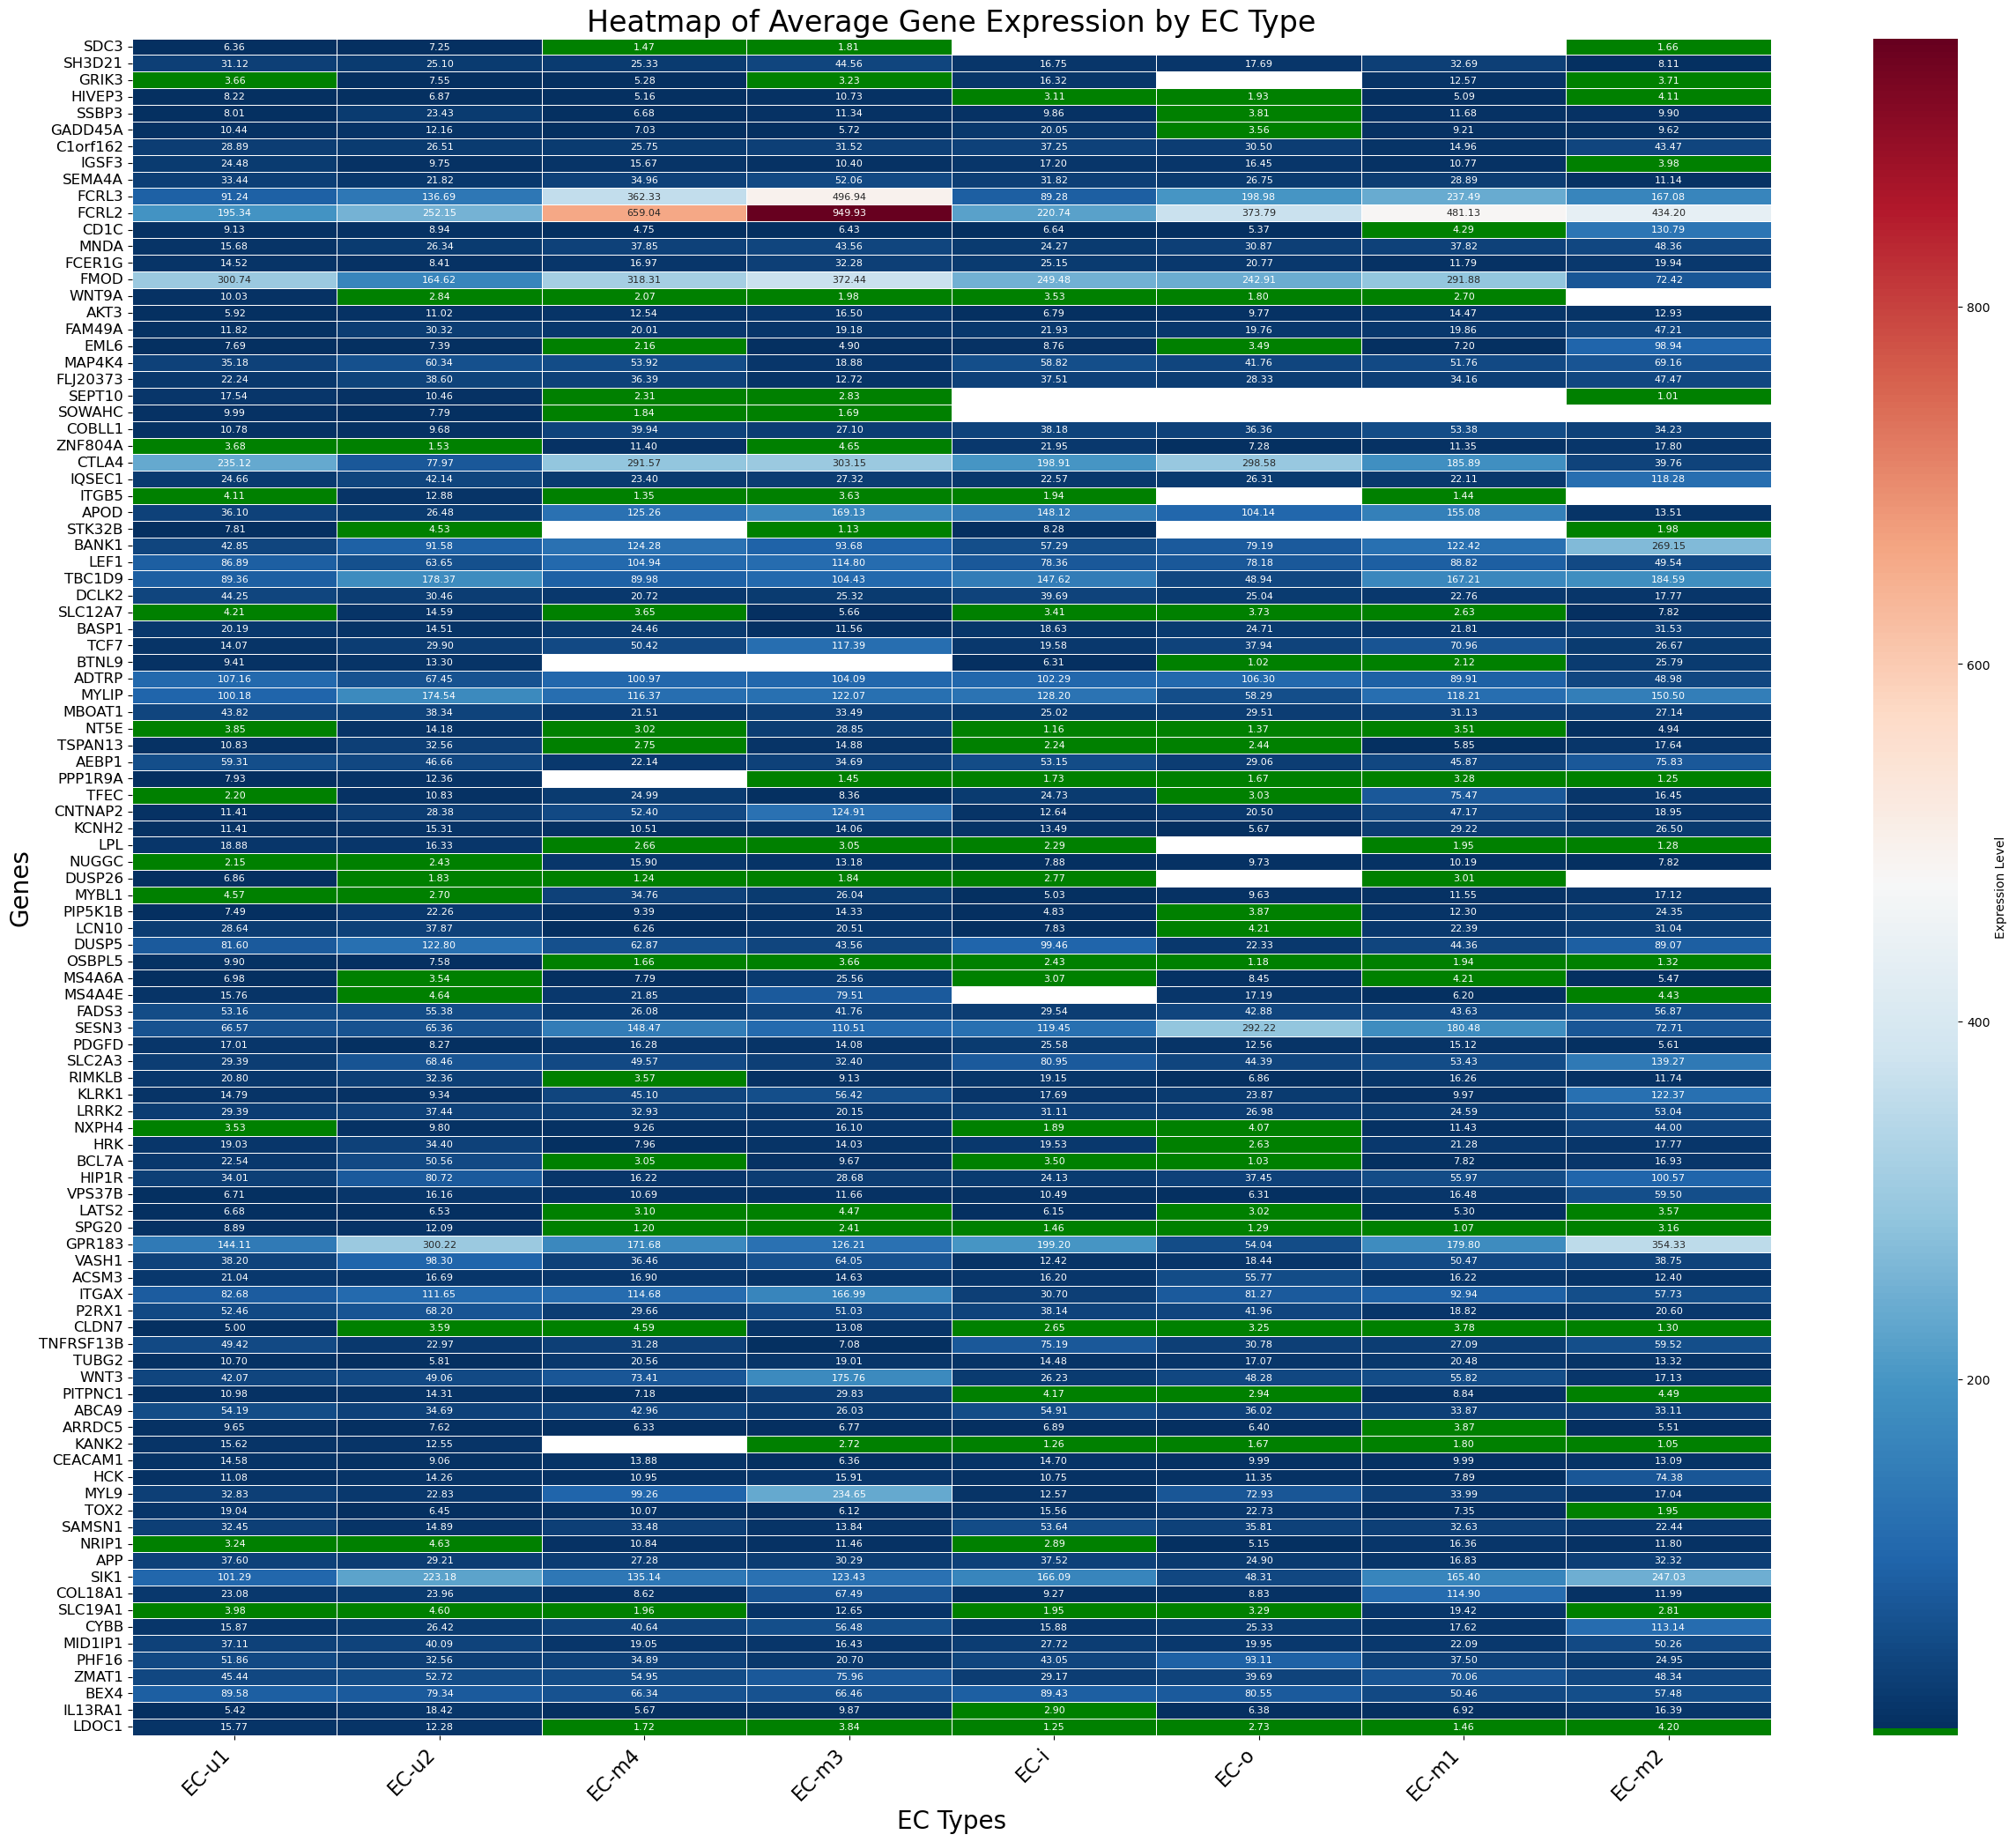

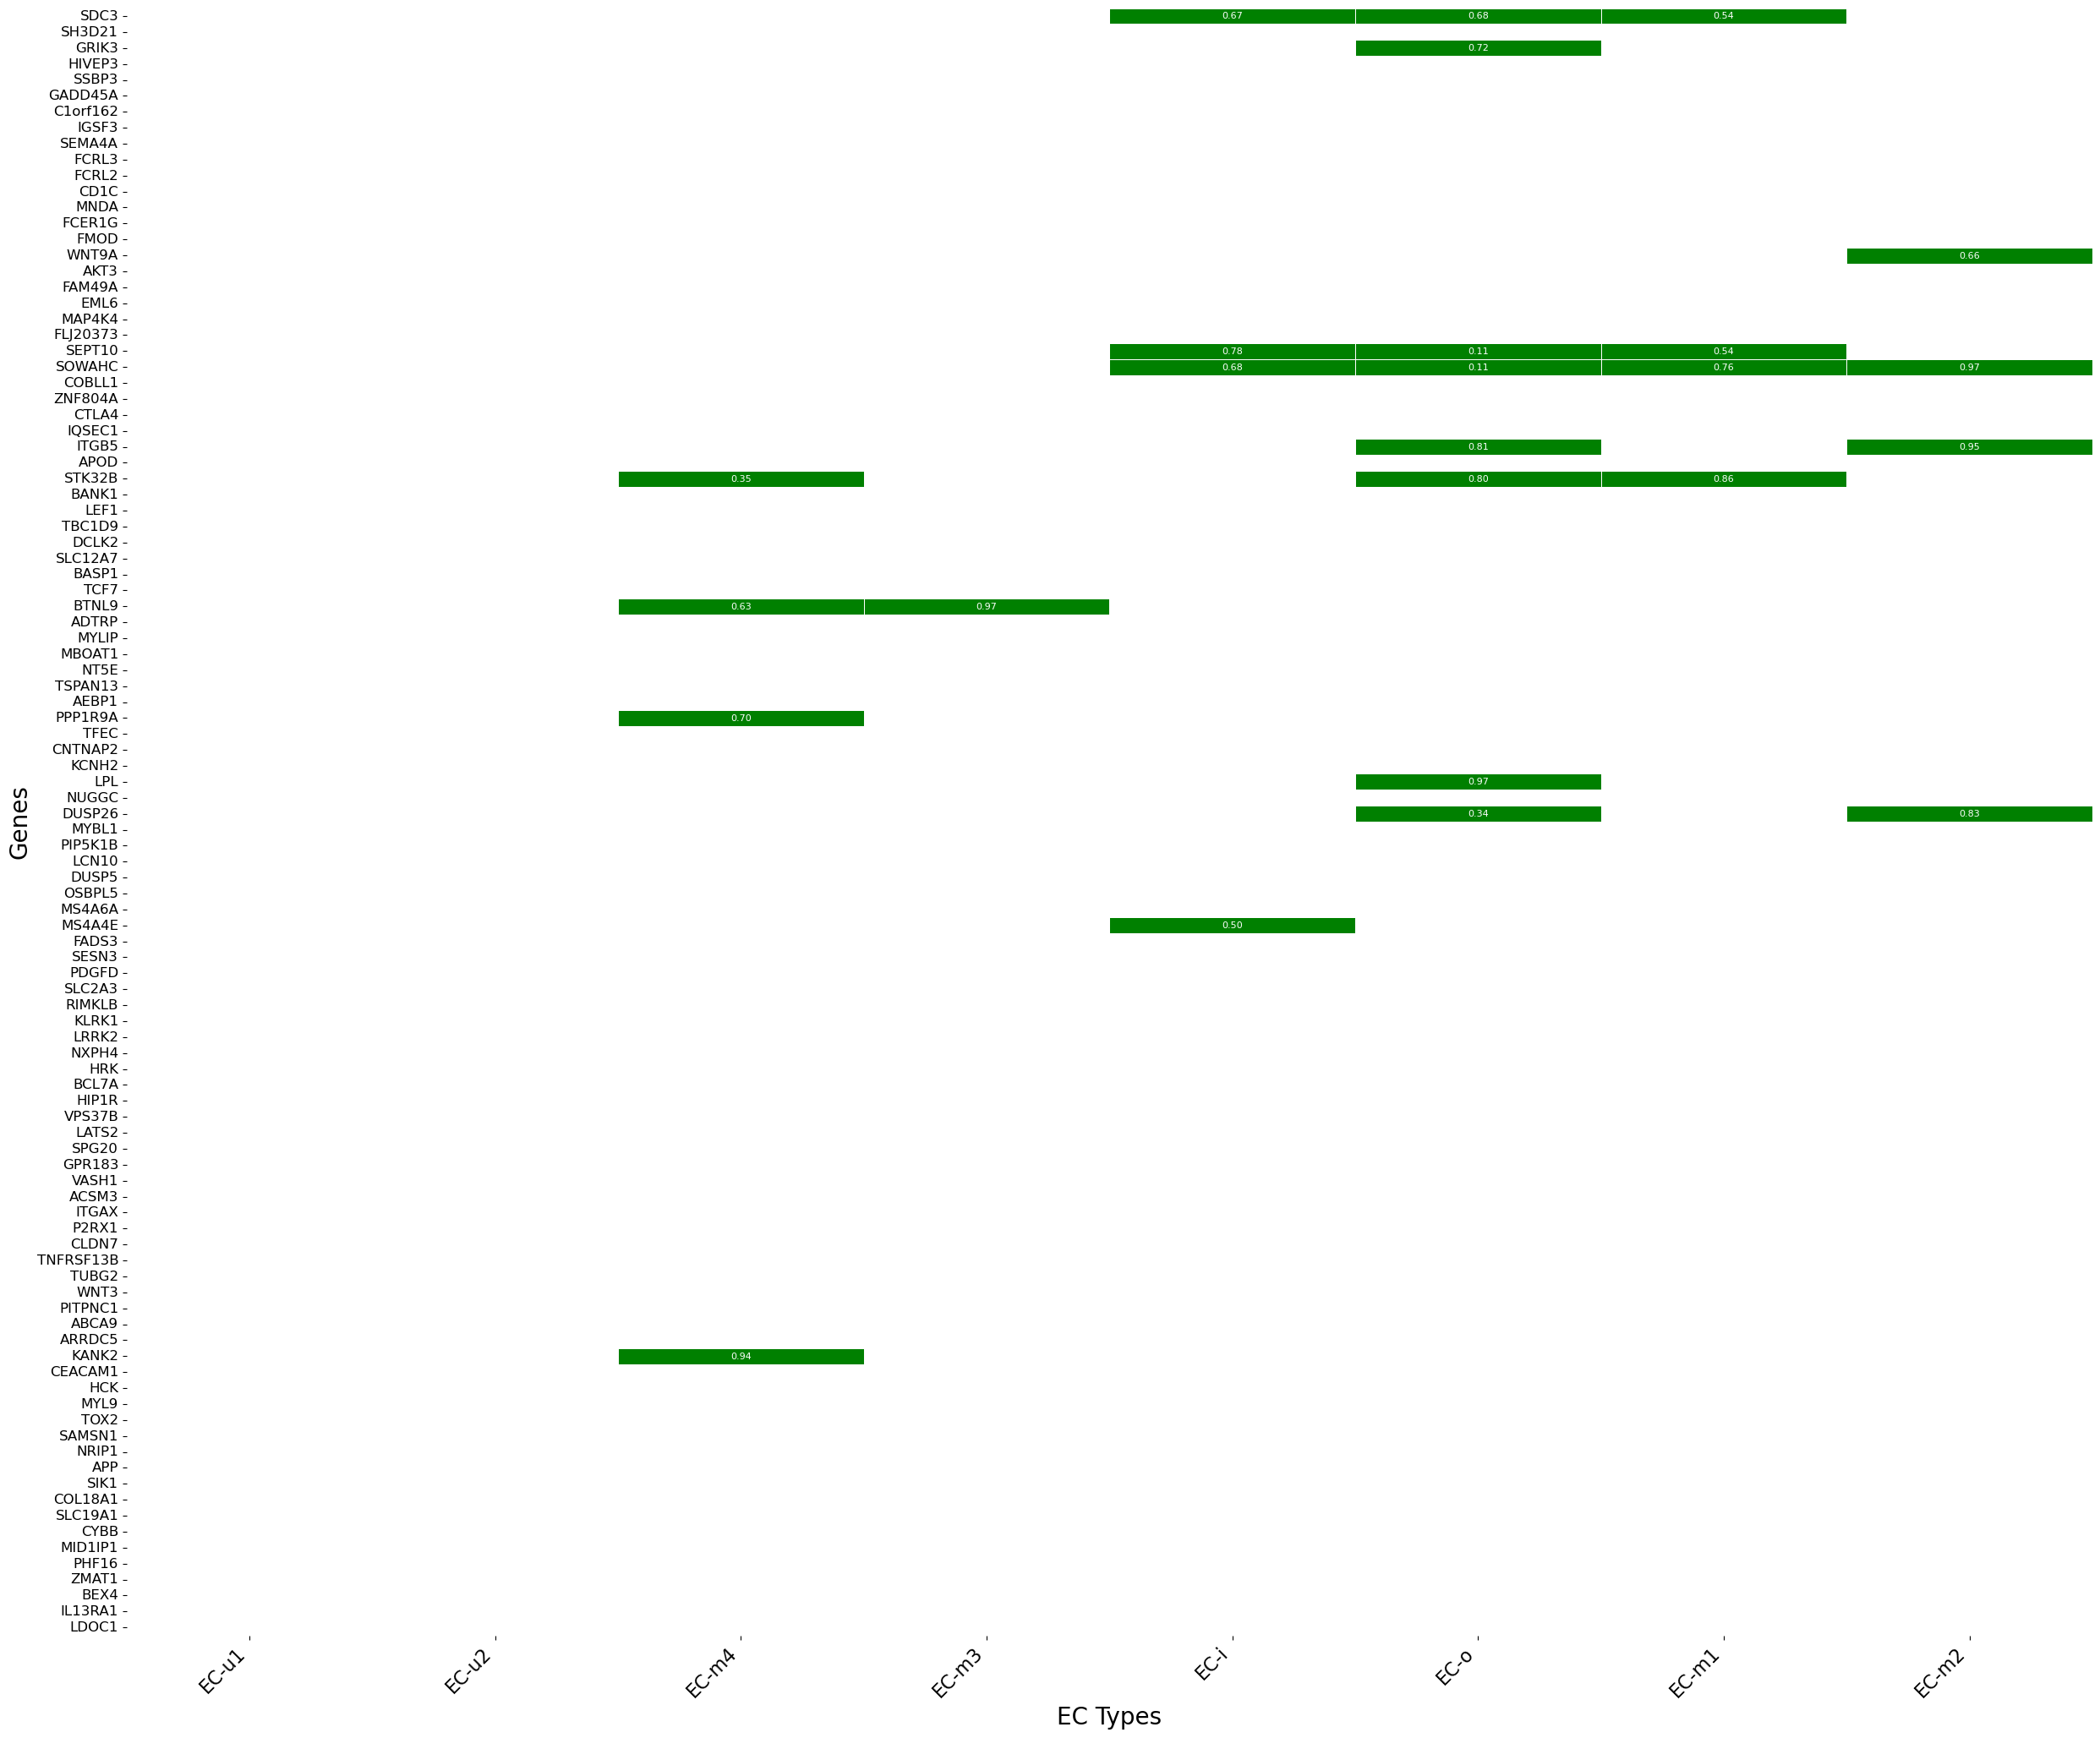

In [15]:
# Need to change this to Viridis color scheme, and make the color in groups of
# 0-0.1
# 0.1-1
# 1-10
# 10-100
# 100+ 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib.colors as mcolors

# Provided code
adata_avg_dict = {}

# Step 1: Calculate average expression for each subset
for ec_type, adata_subset in adata_dict.items():
    avg_expression = np.mean(adata_subset.X, axis=0)  # Calculate the average expression for each gene
    avg_expression = avg_expression.reshape(1, -1)  # Reshape to keep 2D structure
    adata_avg = sc.AnnData(X=avg_expression, var=adata_subset.var.copy())  # Create a new AnnData object
    adata_avg.obs['ec_name'] = [ec_type]  # Add EC type to obs
    adata_avg_dict[ec_type] = adata_avg

# Combine the individual AnnData objects into one
adata_combined = sc.concat(adata_avg_dict.values(), join='outer', merge='same')

# Create a DataFrame for easier handling
df = pd.DataFrame(data=adata_combined.X.T, index=adata_combined.var.index, columns=adata_combined.obs['ec_name'])

# Calculate the average TPM across all EC types
avg_tpm = df.mean(axis=1)
print("Average TPM values:")
print(avg_tpm)

# Filter out genes with an average TPM of under 1
filtered_genes = avg_tpm[avg_tpm >= 1].index
print("Filtered genes (should be >= 1 TPM):")
print(filtered_genes)
df_filtered = df.loc[filtered_genes]

# Print number of genes before and after filtering
initial_genes_count = df.shape[0]
remaining_genes_count = df_filtered.shape[0]
print(f"Number of genes before filtering: {initial_genes_count}")
print(f"Number of genes after filtering: {remaining_genes_count}")

# Create a mask for values less than 1
mask = df_filtered < 1

# Create a custom colormap that includes green for values less than 1
cmap = mcolors.ListedColormap(['green'] + list(sns.color_palette("RdBu_r", 256)))

# Plot the heatmap with the custom colormap and annotate each cell
plt.figure(figsize=(30, 25))  # Increase figure size
sns.heatmap(df_filtered, cmap=cmap, annot=True, fmt=".2f", cbar_kws={'label': 'Expression Level'}, mask=mask, linewidths=.5, annot_kws={"size": 8}, vmin=1)
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.title('Heatmap of Average Gene Expression by EC Type', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
plt.show()

# Overlay the green cells for values less than 1
plt.figure(figsize=(30, 25))  # Increase figure size
sns.heatmap(df_filtered.where(mask), cmap=mcolors.ListedColormap(['green']), annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 8}, cbar=False)
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
plt.show()

/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Average TPM values:
Description
SDC3        2.554940
SH3D21     25.169296
GRIK3       6.629589
HIVEP3      5.654279
SSBP3      10.587626
             ...    
PHF16      42.328089
ZMAT1      52.041256
BEX4       72.455185
IL13RA1     8.995195
LDOC1       5.407129
Length: 102, dtype: float64
Filtered genes (should be >= 1 TPM):
Index(['SDC3', 'SH3D21', 'GRIK3', 'HIVEP3', 'SSBP3', 'GADD45A', 'C1orf162',
       'IGSF3', 'SEMA4A', 'FCRL3',
       ...
       'SIK1', 'COL18A1', 'SLC19A1', 'CYBB', 'MID1IP1', 'PHF16', 'ZMAT1',
       'BEX4', 'IL13RA1', 'LDOC1'],
      dtype='object', name='Description', length=102)
Number of genes before filtering: 102
Number of genes after filtering: 102


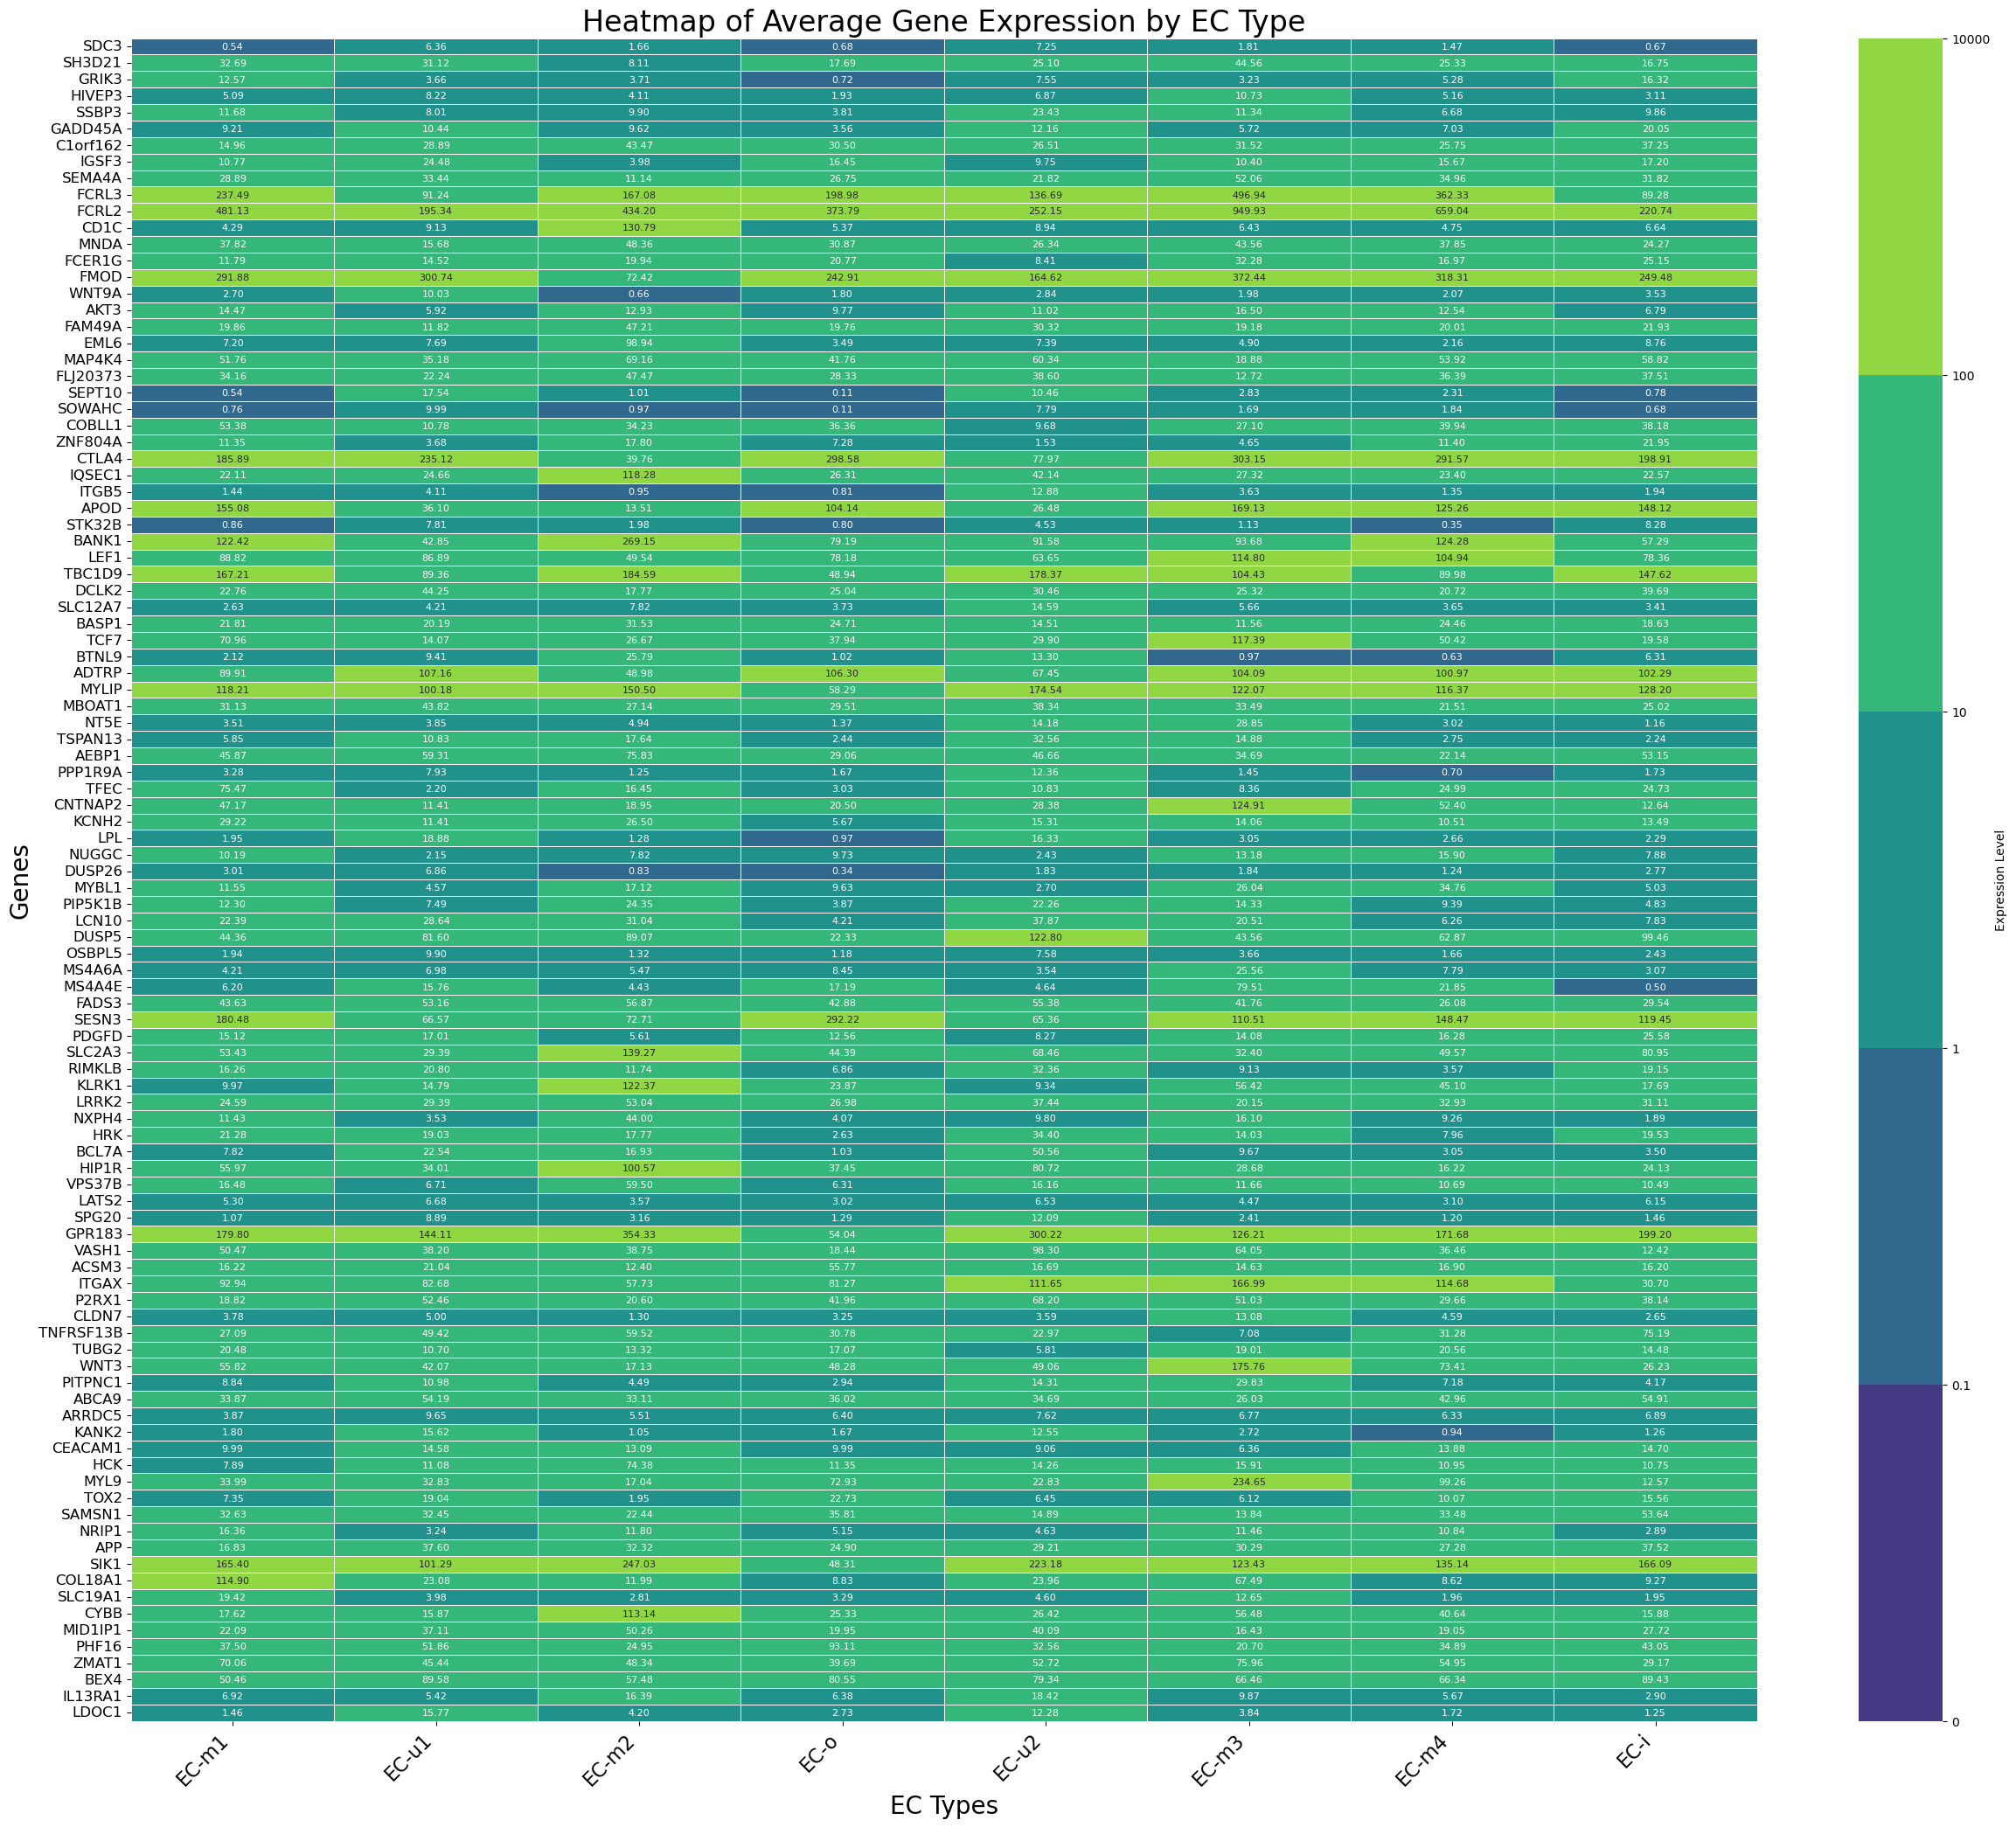

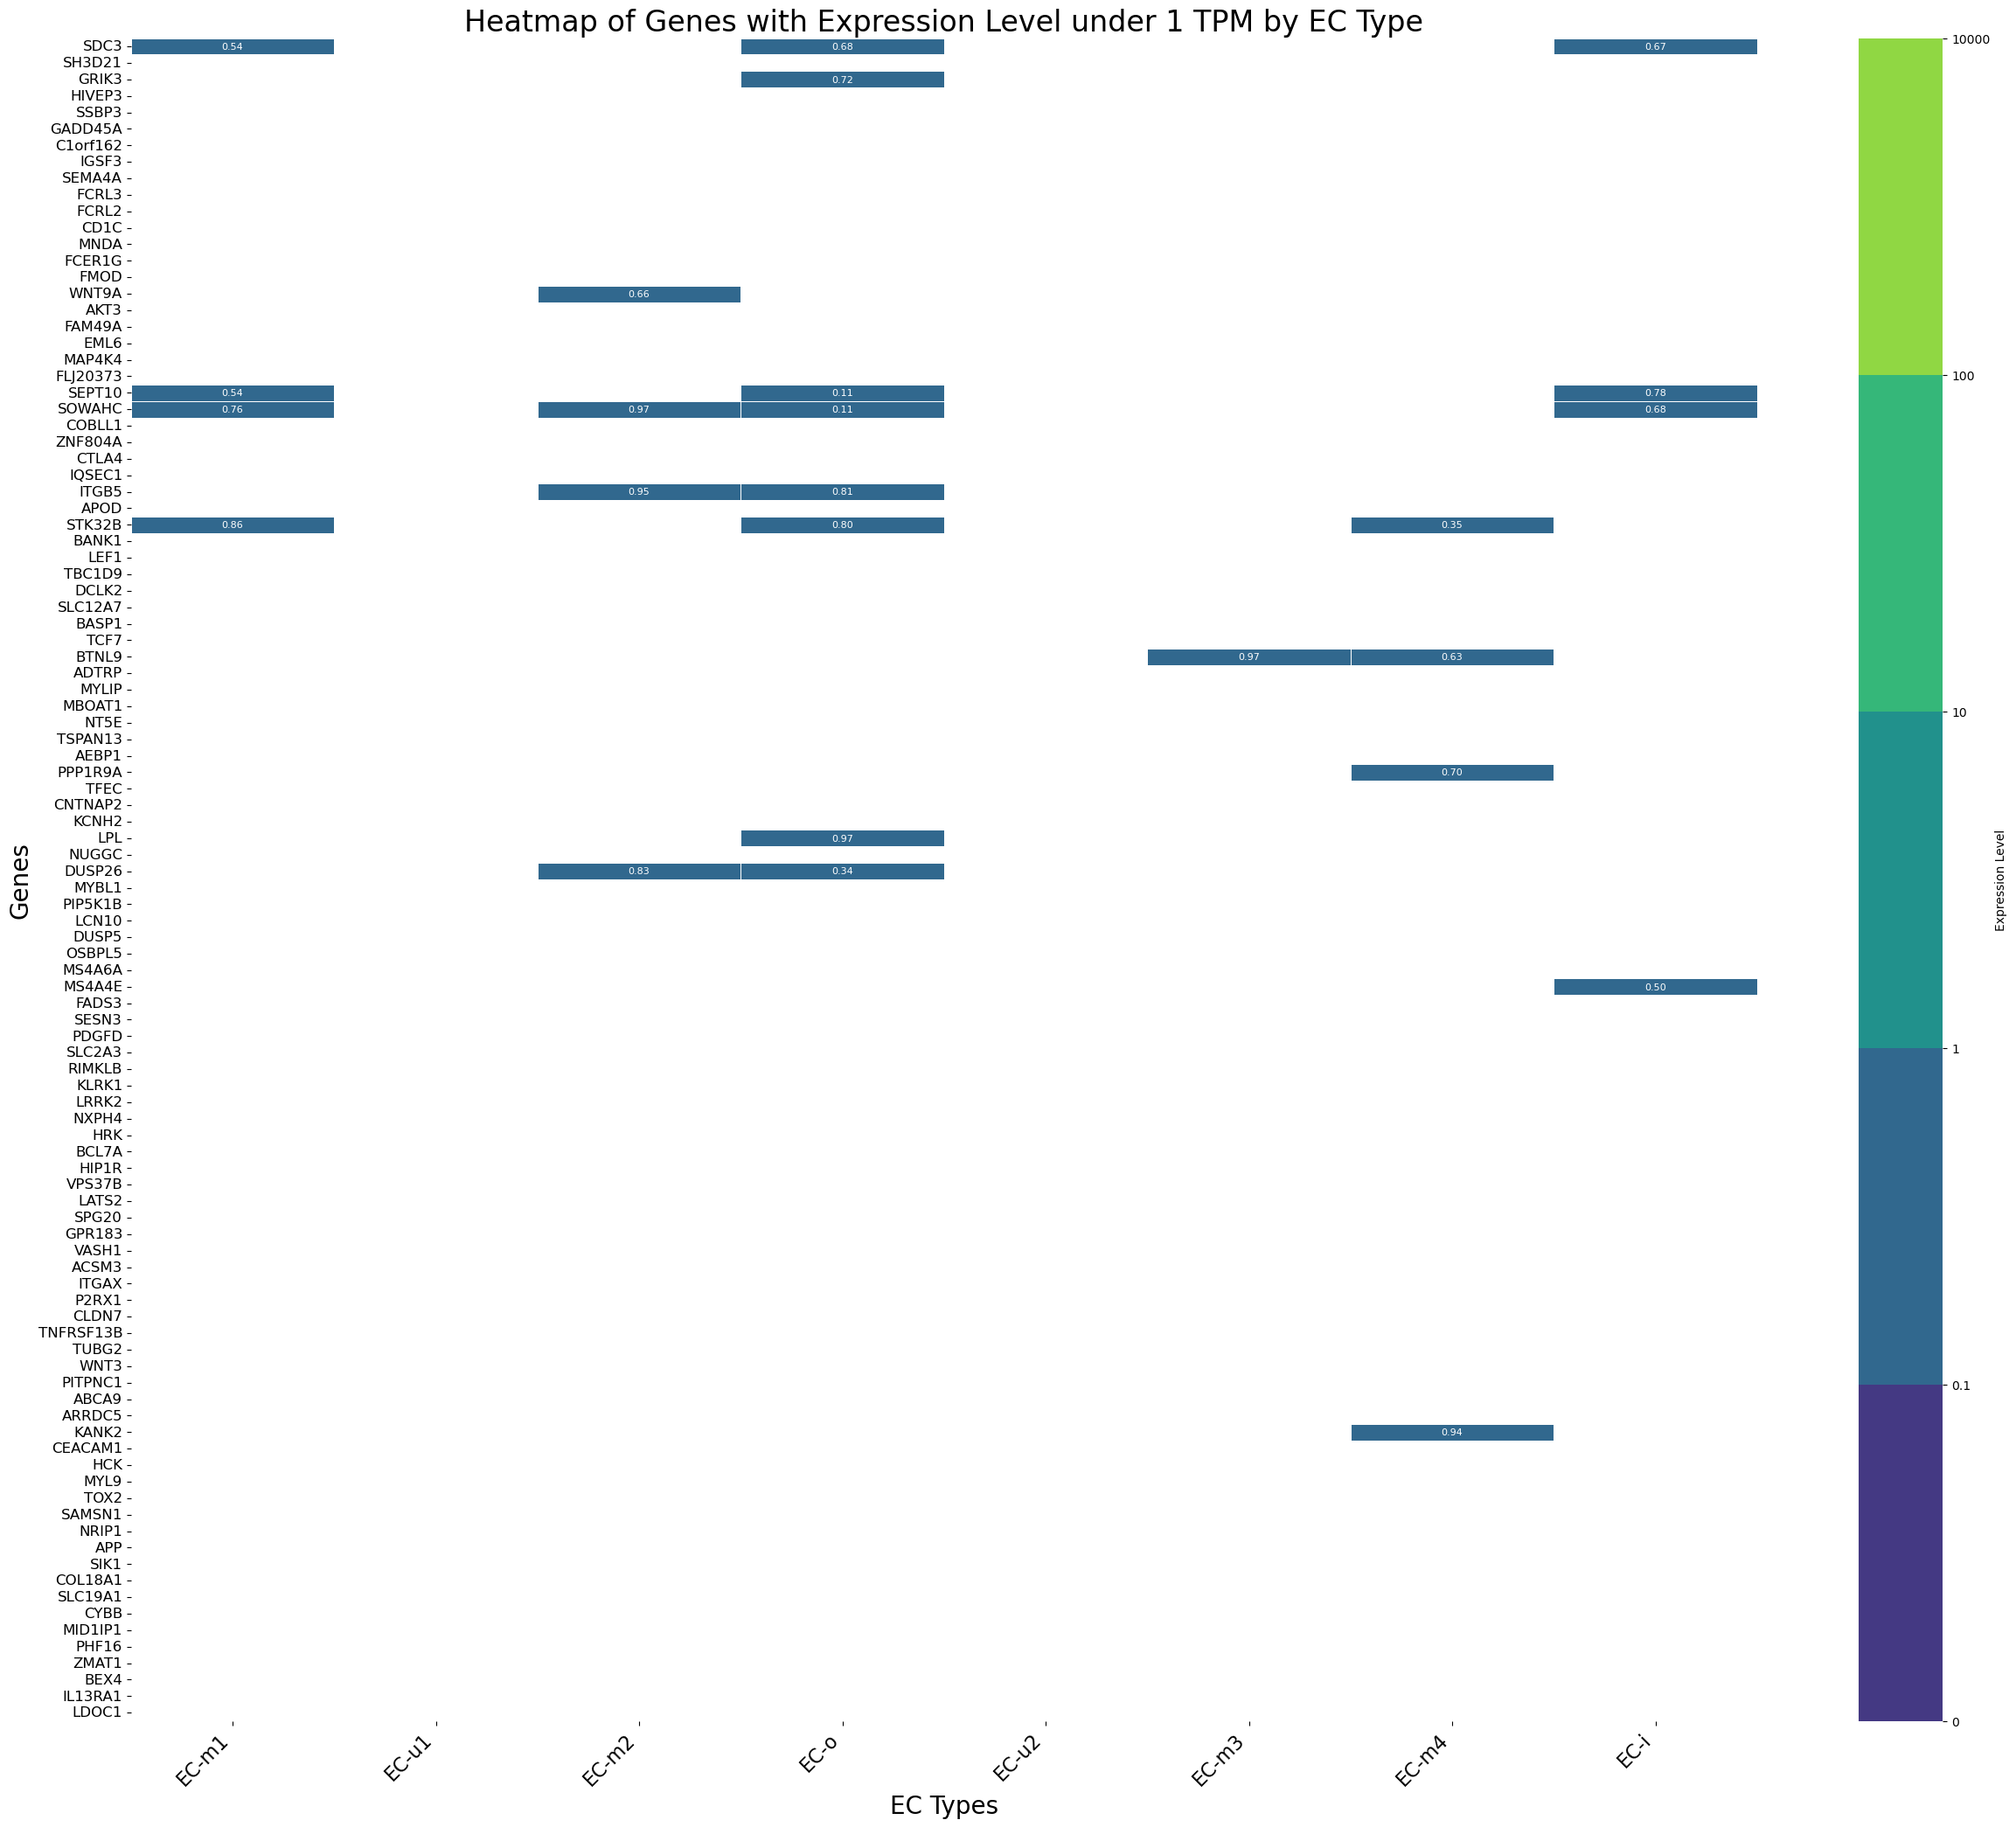

In [16]:
import matplotlib.colors as mcolors

# Provided code
adata_avg_dict = {}

# Step 1: Calculate average expression for each subset
for ec_type, adata_subset in adata_dict.items():
    avg_expression = np.mean(adata_subset.X, axis=0)  # Calculate the average expression for each gene
    avg_expression = avg_expression.reshape(1, -1)  # Reshape to keep 2D structure
    adata_avg = sc.AnnData(X=avg_expression, var=adata_subset.var.copy())  # Create a new AnnData object
    adata_avg.obs['ec_name'] = [ec_type]  # Add EC type to obs
    adata_avg_dict[ec_type] = adata_avg

# Combine the individual AnnData objects into one
adata_combined = sc.concat(adata_avg_dict.values(), join='outer', merge='same')

# Create a DataFrame for easier handling
df = pd.DataFrame(data=adata_combined.X.T, index=adata_combined.var.index, columns=adata_combined.obs['ec_name'])

# Calculate the average TPM across all EC types
avg_tpm = df.mean(axis=1)
print("Average TPM values:")
print(avg_tpm)

# Filter out genes with an average TPM of over 1
filtered_genes = avg_tpm[avg_tpm >= 1].index
print("Filtered genes (should be >= 1 TPM):")
print(filtered_genes)
df_filtered = df.loc[filtered_genes]

# Print number of genes before and after filtering
initial_genes_count = df.shape[0]
remaining_genes_count = df_filtered.shape[0]
print(f"Number of genes before filtering: {initial_genes_count}")
print(f"Number of genes after filtering: {remaining_genes_count}")

# Ensure all values in df are finite
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Ensure all values in df_filtered are finite
df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered.fillna(0, inplace=True)

# Define the desired order for the columns
desired_order = ["EC-m1", "EC-u1", "EC-m2", "EC-o", "EC-u2", "EC-m3", "EC-m4", "EC-i"]

# Reorder the columns
df = df[desired_order]
df_filtered = df_filtered[desired_order]

# Create a custom colormap with specified groups
bounds = [0, 0.1, 1, 10, 100, 10000]
colors = sns.color_palette("viridis", len(bounds) - 1)
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the heatmap with the custom colormap and annotate each cell
plt.figure(figsize=(30, 25))  # Increase figure size
ax = sns.heatmap(df, cmap=cmap, norm=norm, annot=True, fmt=".2f", cbar_kws={'label': 'Expression Level', 'ticks': bounds}, linewidths=.5, annot_kws={"size": 8})
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.title('Heatmap of Average Gene Expression by EC Type', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)
plt.show()

# Plot the second graph with genes having expression level under 1
# Create a mask for values less than 1
mask = df_filtered < 1

plt.figure(figsize=(30, 25))  # Increase figure size
ax = sns.heatmap(df_filtered.where(mask), cmap=cmap, norm=norm, annot=True, fmt=".2f", cbar_kws={'label': 'Expression Level', 'ticks': bounds}, linewidths=.5, annot_kws={"size": 8})
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.title('Heatmap of Genes with Expression Level under 1 TPM by EC Type', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)
plt.show()

/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Average TPM values:
Description
SDC3        2.554940
SH3D21     25.169296
GRIK3       6.629589
HIVEP3      5.654279
SSBP3      10.587626
             ...    
PHF16      42.328089
ZMAT1      52.041256
BEX4       72.455185
IL13RA1     8.995195
LDOC1       5.407129
Length: 102, dtype: float64
Filtered genes (should be >= 1 TPM):
Index(['SDC3', 'SH3D21', 'GRIK3', 'HIVEP3', 'SSBP3', 'GADD45A', 'C1orf162',
       'IGSF3', 'SEMA4A', 'FCRL3',
       ...
       'SIK1', 'COL18A1', 'SLC19A1', 'CYBB', 'MID1IP1', 'PHF16', 'ZMAT1',
       'BEX4', 'IL13RA1', 'LDOC1'],
      dtype='object', name='Description', length=102)
Number of genes before filtering: 102
Number of genes after filtering: 102


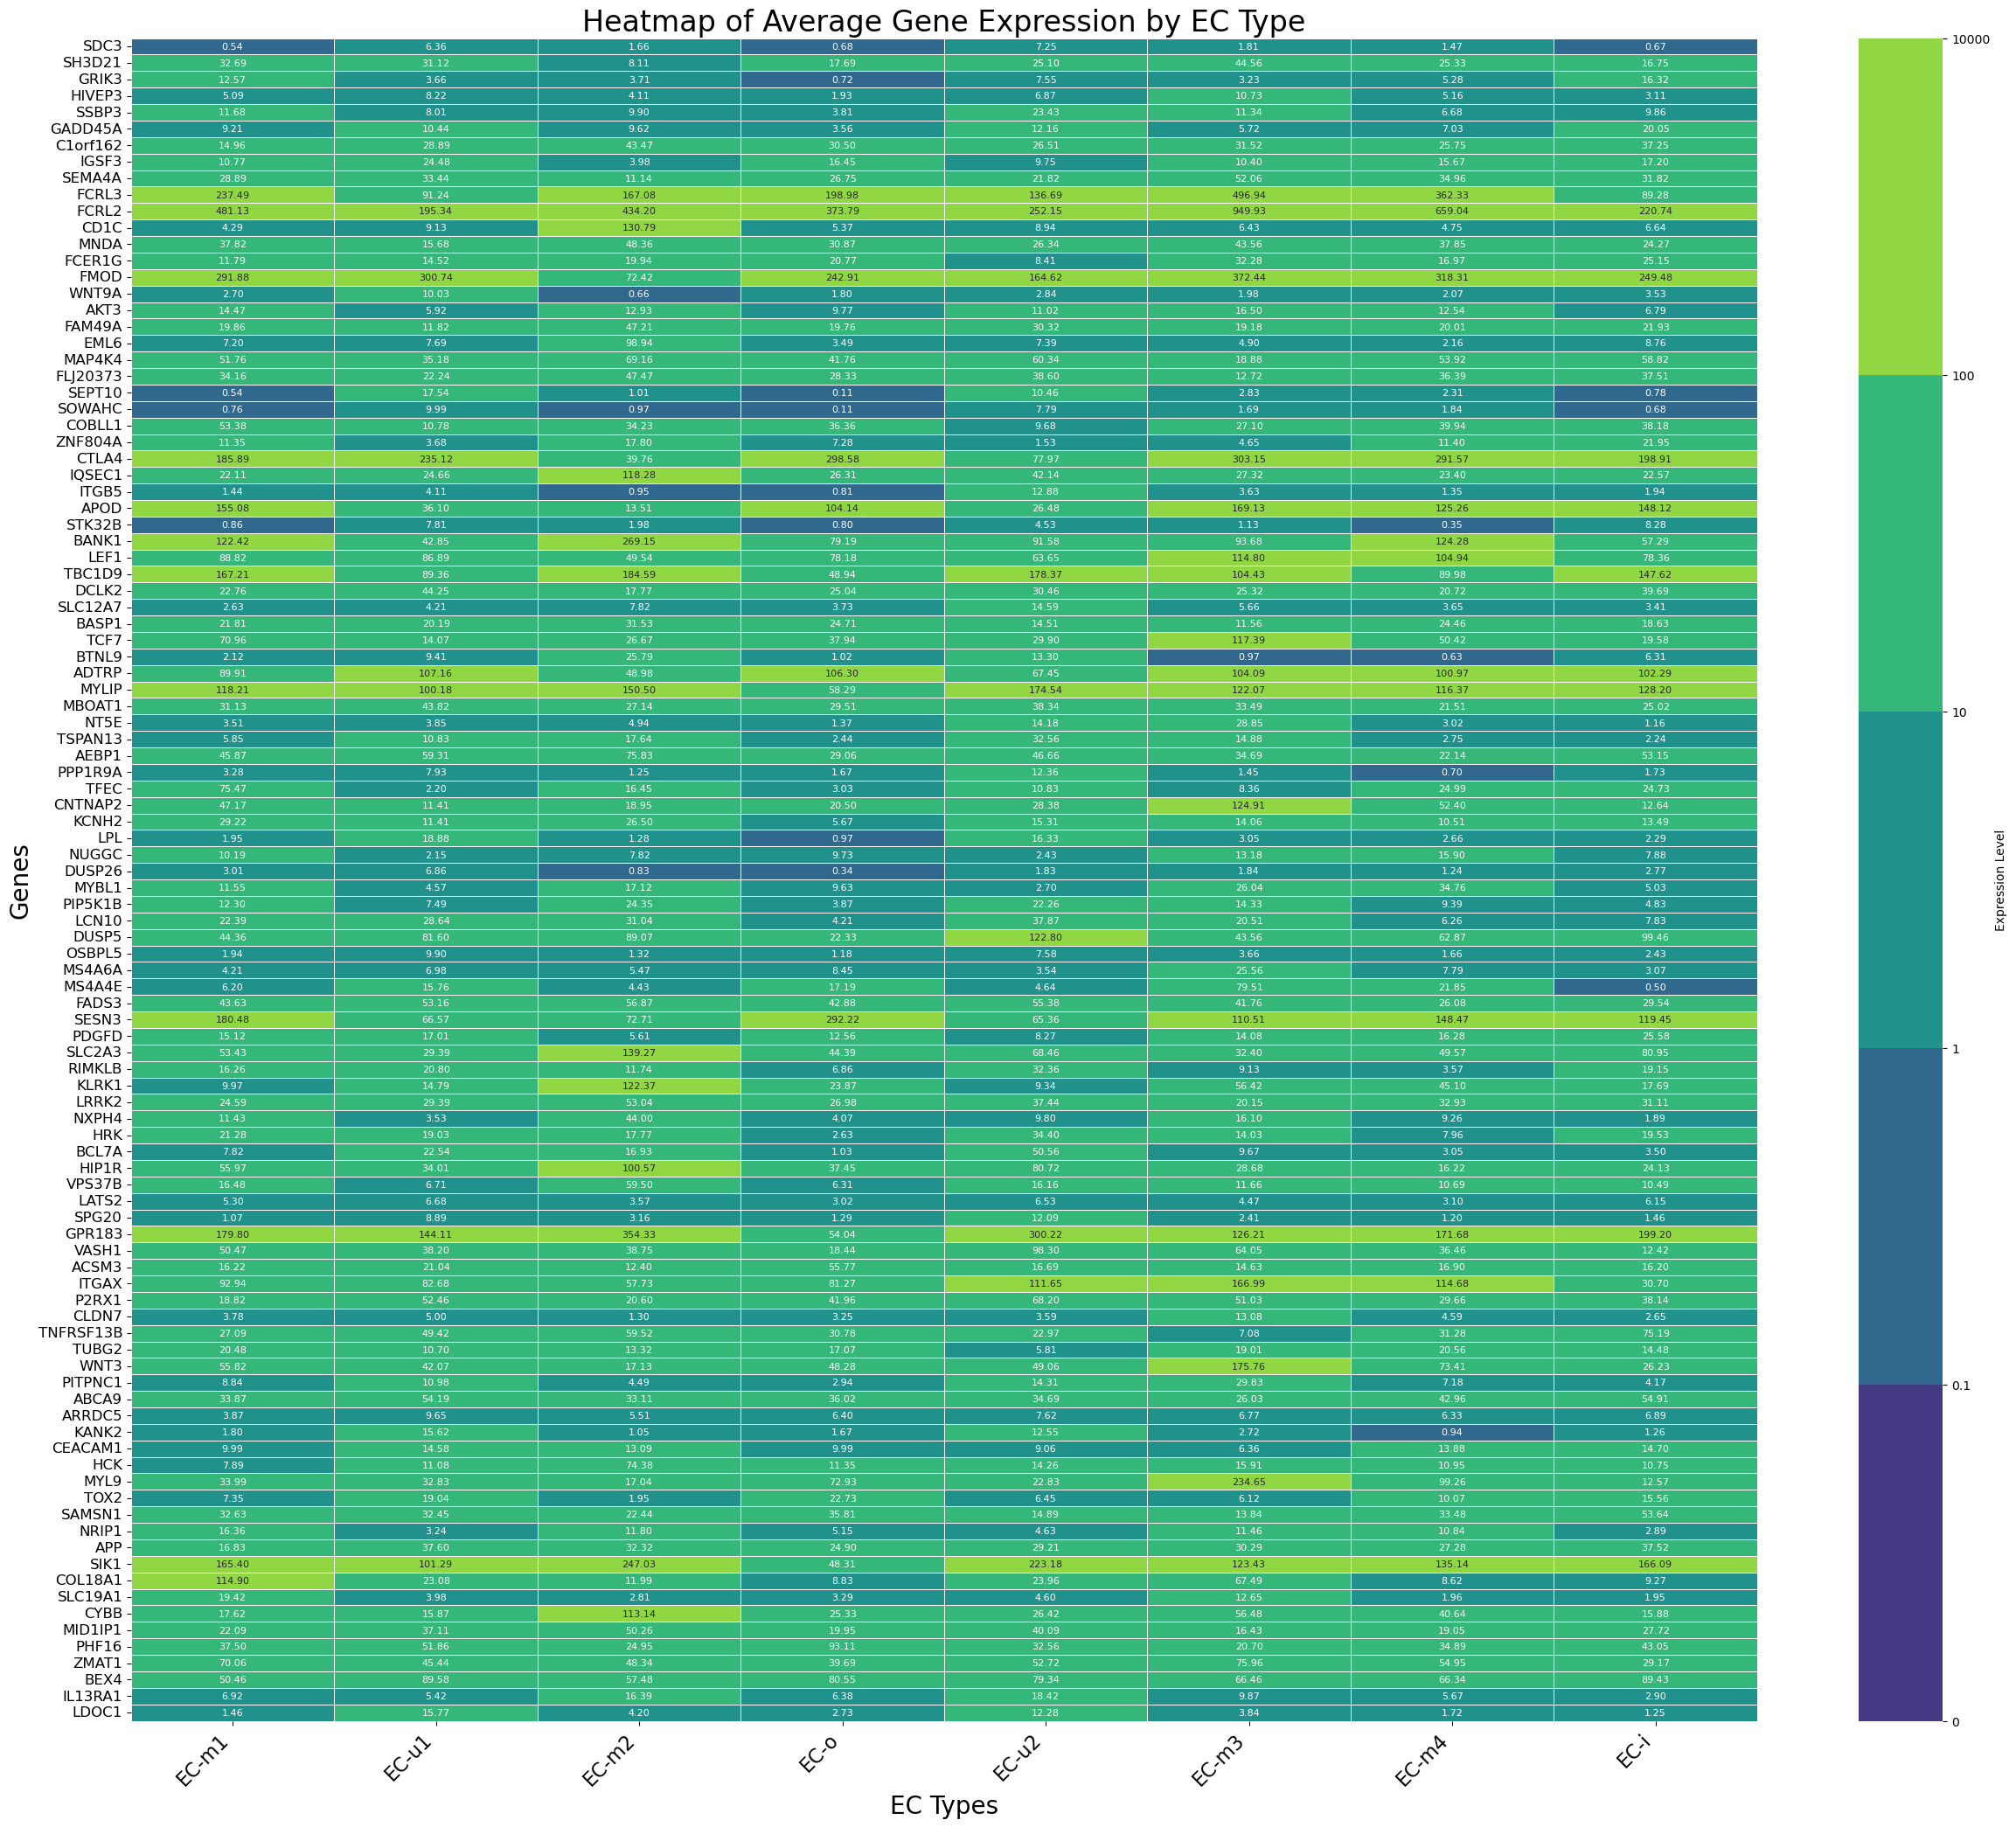

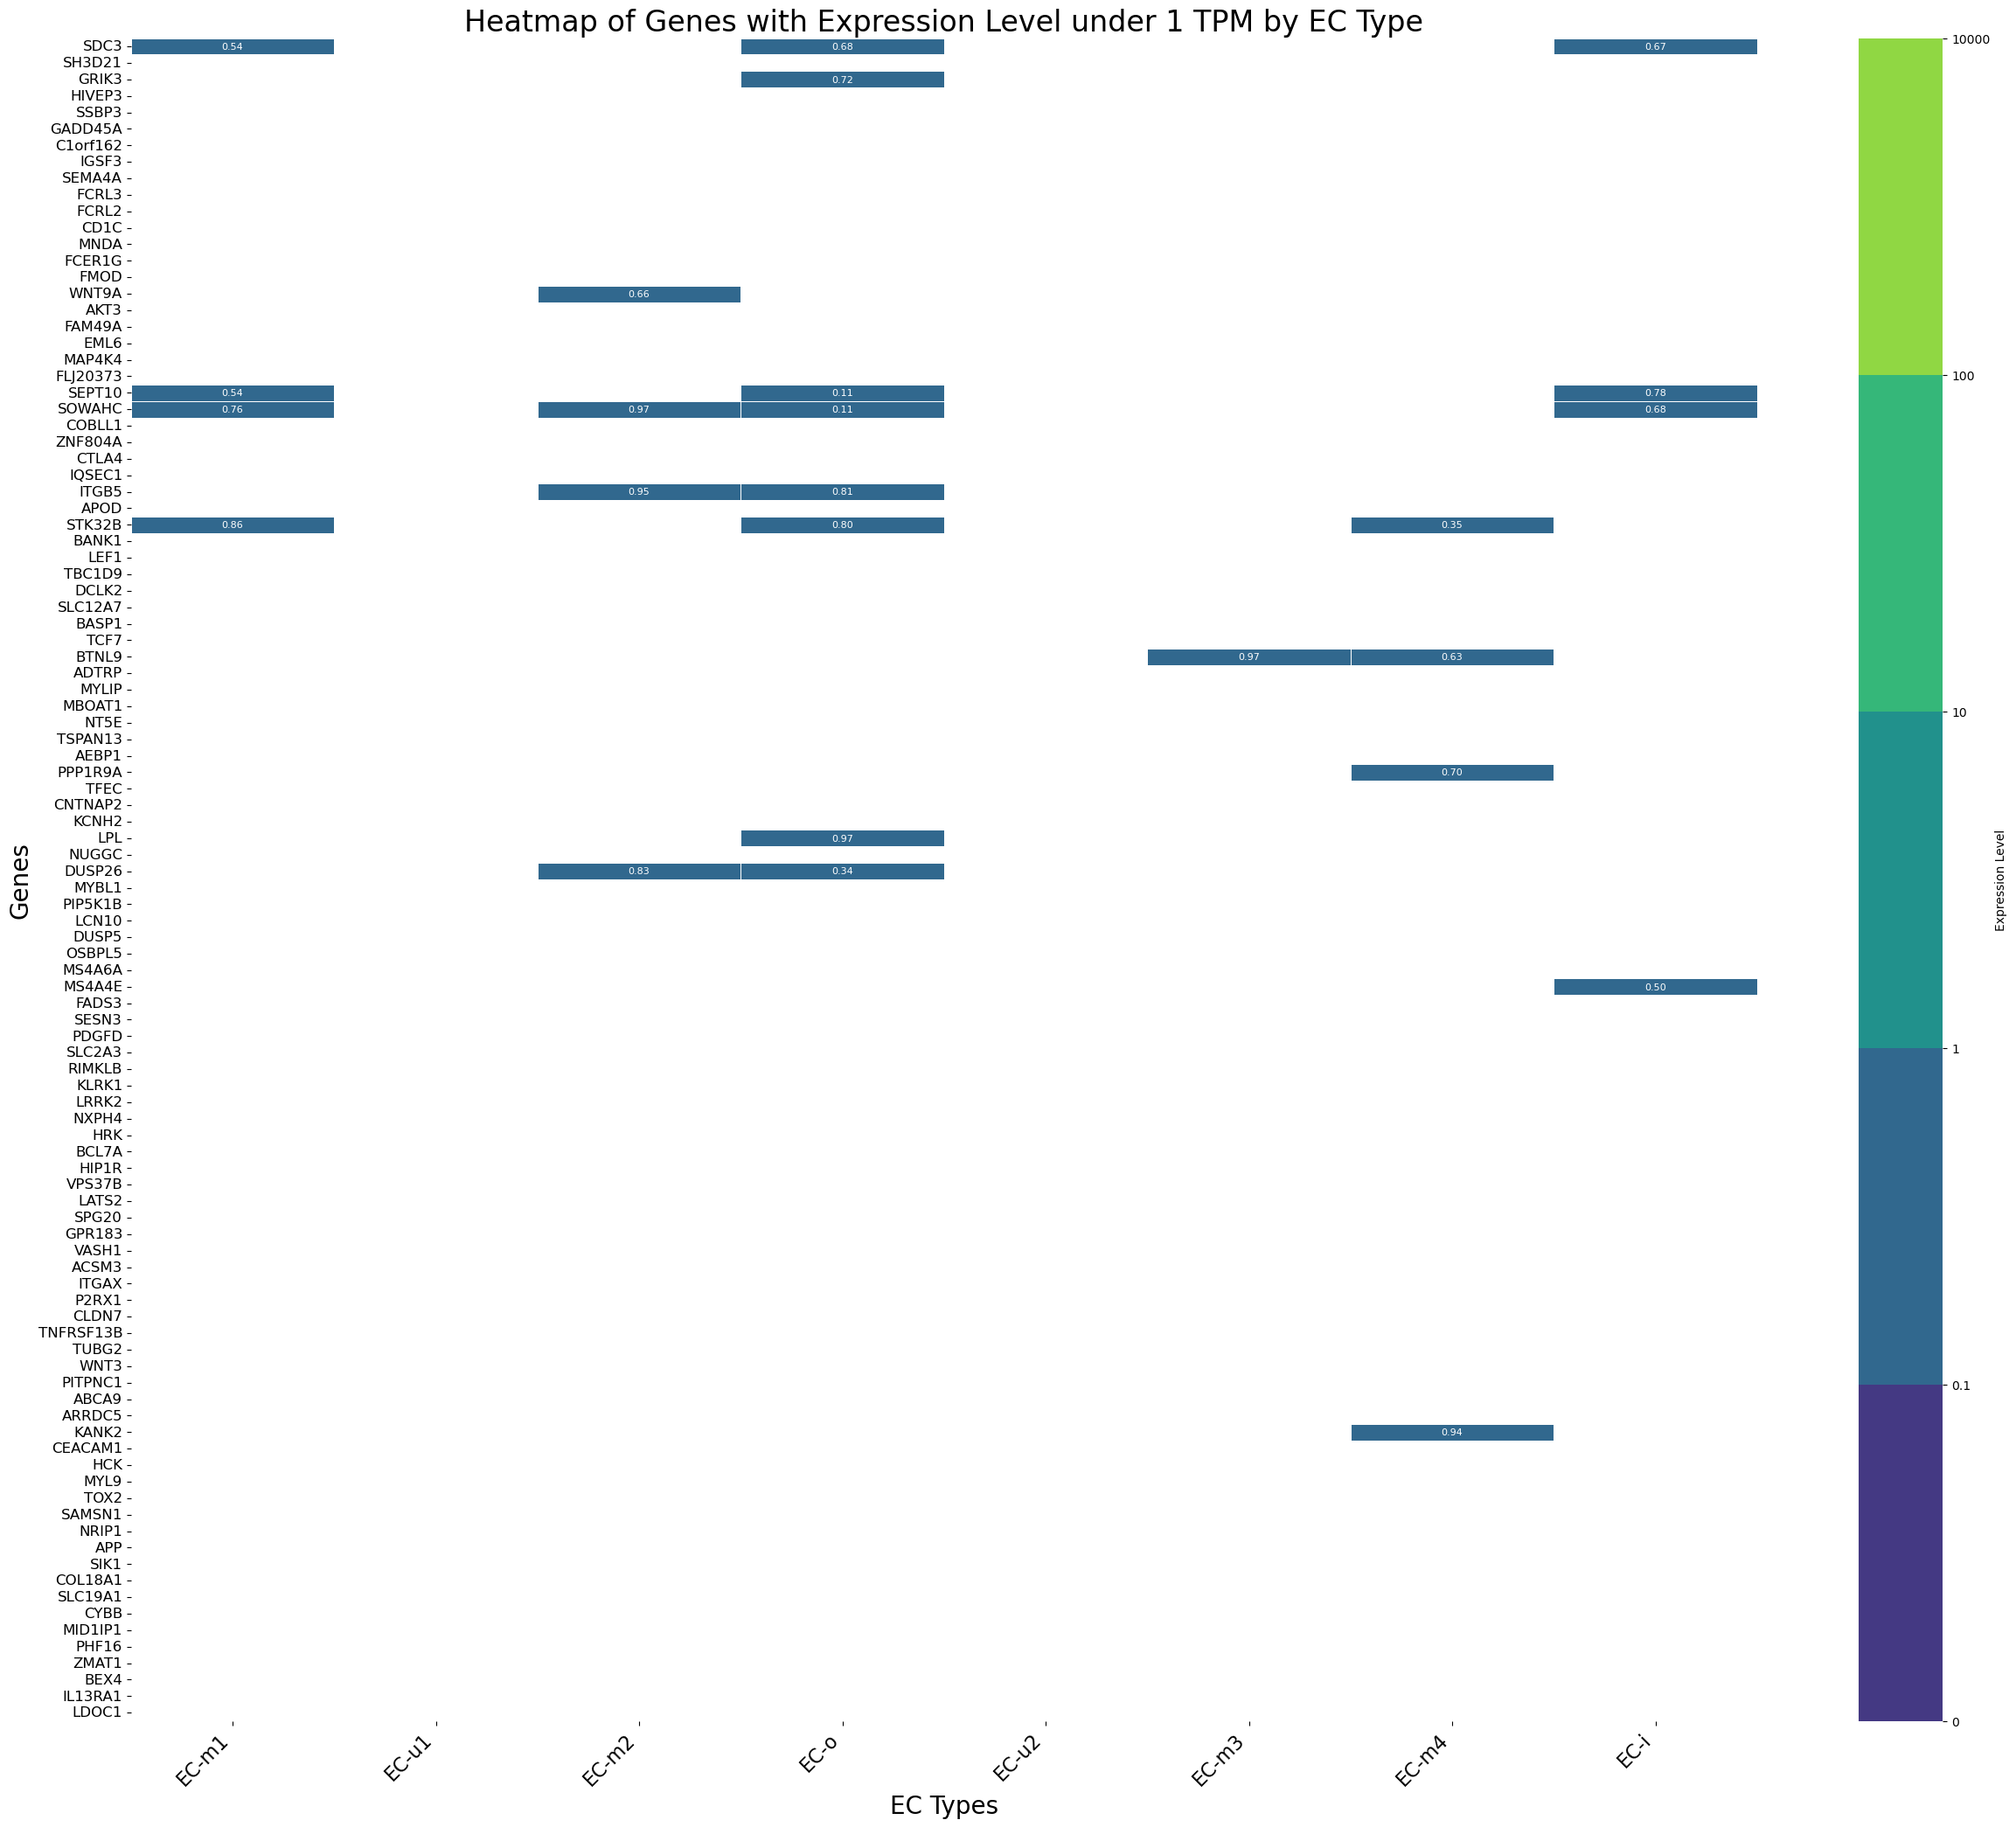

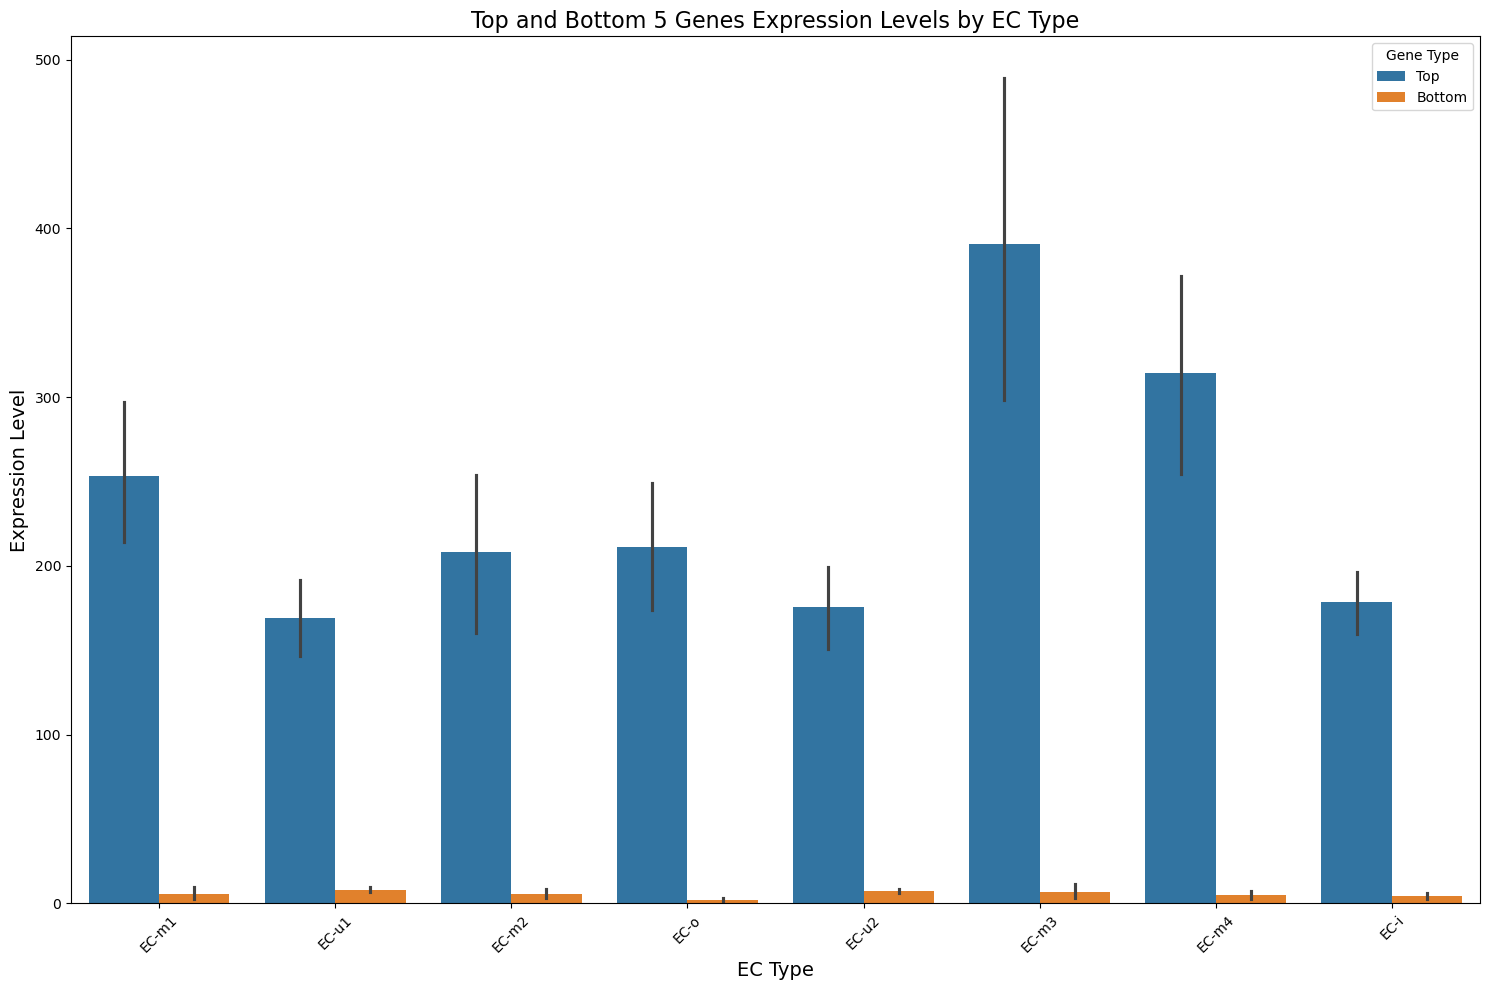

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

# Provided code
adata_avg_dict = {}

# Step 1: Calculate average expression for each subset
for ec_type, adata_subset in adata_dict.items():
    avg_expression = np.mean(adata_subset.X, axis=0)  # Calculate the average expression for each gene
    avg_expression = avg_expression.reshape(1, -1)  # Reshape to keep 2D structure
    adata_avg = sc.AnnData(X=avg_expression, var=adata_subset.var.copy())  # Create a new AnnData object
    adata_avg.obs['ec_name'] = [ec_type]  # Add EC type to obs
    adata_avg_dict[ec_type] = adata_avg

# Combine the individual AnnData objects into one
adata_combined = sc.concat(adata_avg_dict.values(), join='outer', merge='same')

# Create a DataFrame for easier handling
df = pd.DataFrame(data=adata_combined.X.T, index=adata_combined.var.index, columns=adata_combined.obs['ec_name'])

# Calculate the average TPM across all EC types
avg_tpm = df.mean(axis=1)
print("Average TPM values:")
print(avg_tpm)

# Filter out genes with an average TPM of over 1
filtered_genes = avg_tpm[avg_tpm >= 1].index
print("Filtered genes (should be >= 1 TPM):")
print(filtered_genes)
df_filtered = df.loc[filtered_genes]

# Print number of genes before and after filtering
initial_genes_count = df.shape[0]
remaining_genes_count = df_filtered.shape[0]
print(f"Number of genes before filtering: {initial_genes_count}")
print(f"Number of genes after filtering: {remaining_genes_count}")

# Ensure all values in df are finite
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Ensure all values in df_filtered are finite
df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered.fillna(0, inplace=True)

# Define the desired order for the columns
desired_order = ["EC-m1", "EC-u1", "EC-m2", "EC-o", "EC-u2", "EC-m3", "EC-m4", "EC-i"]

# Reorder the columns
df = df[desired_order]
df_filtered = df_filtered[desired_order]

# Create a custom colormap with specified groups
bounds = [0, 0.1, 1, 10, 100, 10000]
colors = sns.color_palette("viridis", len(bounds) - 1)
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the heatmap with the custom colormap and annotate each cell
plt.figure(figsize=(30, 25))  # Increase figure size
ax = sns.heatmap(df, cmap=cmap, norm=norm, annot=True, fmt=".2f", cbar_kws={'label': 'Expression Level', 'ticks': bounds}, linewidths=.5, annot_kws={"size": 8})
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.title('Heatmap of Average Gene Expression by EC Type', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)
plt.show()

# Plot the second graph with genes having expression level under 1
# Create a mask for values less than 1
mask = df_filtered < 1

plt.figure(figsize=(30, 25))  # Increase figure size
ax = sns.heatmap(df_filtered.where(mask), cmap=cmap, norm=norm, annot=True, fmt=".2f", cbar_kws={'label': 'Expression Level', 'ticks': bounds}, linewidths=.5, annot_kws={"size": 8})
plt.xlabel('EC Types', fontsize=20)
plt.ylabel('Genes', fontsize=20)
plt.title('Heatmap of Genes with Expression Level under 1 TPM by EC Type', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)  # Reduce y-axis label font size
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)
plt.show()

# Initialize dictionaries to store top and bottom genes for each EC
top_genes_dict = {}
bottom_genes_dict = {}

# Find top 5 most expressive and least expressive genes for each EC
for ec_type in df.columns:
    sorted_genes = df[ec_type].sort_values(ascending=False)
    top_genes_dict[ec_type] = sorted_genes.head(5).index.tolist()
    bottom_genes_dict[ec_type] = sorted_genes.tail(5).index.tolist()

# Combine all top and bottom genes into a single list
all_top_genes = [gene for genes in top_genes_dict.values() for gene in genes]
all_bottom_genes = [gene for genes in bottom_genes_dict.values() for gene in genes]

# Create a DataFrame to store the expression values of top and bottom genes
top_genes_df = df.loc[all_top_genes]
bottom_genes_df = df.loc[all_bottom_genes]

# Create a DataFrame for plotting
plot_df = pd.concat([top_genes_df, bottom_genes_df])
plot_df['Gene'] = plot_df.index
plot_df = plot_df.melt(id_vars='Gene', var_name='EC Type', value_name='Expression')

# Add a column to differentiate top and bottom genes
plot_df['Gene Type'] = plot_df['Gene'].apply(lambda x: 'Top' if x in all_top_genes else 'Bottom')

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a bar plot
sns.barplot(data=plot_df, x='EC Type', y='Expression', hue='Gene Type', dodge=True)

# Set plot labels and title
plt.xlabel('EC Type', fontsize=14)
plt.ylabel('Expression Level', fontsize=14)
plt.title('Top and Bottom 5 Genes Expression Levels by EC Type', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Gene Type')

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
if 'GRIK3' in df.index:
    il13ra1_values = df.loc['GRIK3']
    print(f"Expression values for GRIK3:\n{il13ra1_values}")
else:
    print("IL13RA1 not found in the dataset.")

Expression values for GRIK3:
ec_name
EC-m1    12.568265
EC-u1     3.661965
EC-m2     3.711382
EC-o      0.718510
EC-u2     7.547641
EC-m3     3.231374
EC-m4     5.280407
EC-i     16.317166
Name: GRIK3, dtype: float64


In [19]:
def normalize_to_one(adata):
    # Normalize each row to sum to 1
    normalized_X = adata.X / adata.X.sum(axis=1, keepdims=True)
    return sc.AnnData(X=normalized_X, obs=adata.obs.copy(), var=adata.var.copy())

# Dictionary to store normalized AnnData objects
adata_normalized_dict = {}

# Normalize each EC type separately
for ec_type, adata_subset in adata_avg_dict.items():
    adata_normalized = normalize_to_one(adata_subset)
    adata_normalized_dict[ec_type] = adata_normalized

# Combine the normalized AnnData objects into one
adata_combined_normalized = sc.concat(adata_normalized_dict.values(), join='outer', merge='same')

# Verify the combined normalized AnnData object
print(adata_combined_normalized.obs)

def validate_normalization(adata):
    row_sums = adata.X.sum(axis=1)
    return np.allclose(row_sums, 1)

for ec_type, adata_normalized in adata_normalized_dict.items():
    is_valid = validate_normalization(adata_normalized)
    print(f"Normalization validation for {ec_type}: {is_valid}")


  ec_name
0   EC-u1
0   EC-u2
0   EC-m4
0   EC-m3
0    EC-i
0    EC-o
0   EC-m1
0   EC-m2
Normalization validation for EC-u1: True
Normalization validation for EC-u2: True
Normalization validation for EC-m4: True
Normalization validation for EC-m3: True
Normalization validation for EC-i: True
Normalization validation for EC-o: True
Normalization validation for EC-m1: True
Normalization validation for EC-m2: True


/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
from scipy.stats import spearmanr

check = sc.read_h5ad("ECs_allGens_tpm.h5ad")

# Step 1: Subset the AnnData object to include only the sample 'CRC-0004'
ec_profiles = pd.DataFrame(adata_combined_normalized.X.T, index=adata_combined_normalized.var_names, columns=adata_combined_normalized.obs['ec_name'])

# Step 1: Ensure that the original data and EC profiles have the same genes (rows)
common_genes = check.var_names.intersection(ec_profiles.index)
check = check[:, common_genes]
ec_profiles = ec_profiles.loc[common_genes]

# Step 2: Compute Spearman correlation for each sample
# Create a DataFrame to store the correlation results
correlation_results = pd.DataFrame(index=check.obs.index, columns=ec_profiles.columns)

def compute_spearman_correlations(sample_expression, ec_profiles):
    correlations = {}
    for ec_type in ec_profiles.columns:
        ec_expression = ec_profiles[ec_type]
        correlation, _ = spearmanr(sample_expression, ec_expression)
        correlations[ec_type] = correlation
    return correlations

# Iterate over each sample in the check AnnData object
for sample_id in check.obs.index:
    sample_expression = check[sample_id, :].X.flatten()
    correlations = compute_spearman_correlations(sample_expression, ec_profiles)
    for ec_type, correlation in correlations.items():
        correlation_results.loc[sample_id, ec_type] = correlation




# Dictionary to store the highest EC type for each sample
closest_ec_types_per_sample = {}
for sample_id in correlation_results.index:
    highest_ec_type = correlation_results.loc[sample_id].idxmax()
    highest_correlation = correlation_results.loc[sample_id, highest_ec_type]
    close_ec_types = correlation_results.loc[sample_id][correlation_results.loc[sample_id] >= highest_correlation].index.tolist()
    closest_ec_types_per_sample[sample_id] = close_ec_types

# Print the dictionary with the highest EC type and close EC types per sample
for sample_id, ec_types in closest_ec_types_per_sample.items():
    print(f"Sample: {sample_id}, Highest EC Type: {ec_types[0]}, Close EC Types: {ec_types}")



Sample: CRC-0001, Highest EC Type: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0002, Highest EC Type: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0003, Highest EC Type: EC-u2, Close EC Types: ['EC-u2']
Sample: CRC-0004, Highest EC Type: EC-m4, Close EC Types: ['EC-m4']
Sample: CRC-0005, Highest EC Type: EC-m2, Close EC Types: ['EC-m2']
Sample: CRC-0006, Highest EC Type: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0009, Highest EC Type: EC-m3, Close EC Types: ['EC-m3']
Sample: CRC-0010, Highest EC Type: EC-m4, Close EC Types: ['EC-m4']
Sample: CRC-0012, Highest EC Type: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0013, Highest EC Type: EC-m4, Close EC Types: ['EC-m4']
Sample: CRC-0015, Highest EC Type: EC-o, Close EC Types: ['EC-o']
Sample: CRC-0016, Highest EC Type: EC-m1, Close EC Types: ['EC-m1']
Sample: CRC-0017, Highest EC Type: EC-o, Close EC Types: ['EC-o']
Sample: CRC-0018, Highest EC Type: EC-o, Close EC Types: ['EC-o']
Sample: CRC-0019, Highest EC Type: EC-m4, Close EC Typ

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the highest and second-highest correlations for each sample
highest_corr = correlation_results.max(axis=1)
second_highest_corr = correlation_results.apply(lambda row: row.nlargest(2).iloc[1], axis=1)
correlation_diff = highest_corr - second_highest_corr

# Create a DataFrame for plotting
correlation_diff_df = pd.DataFrame({
    'Sample': correlation_results.index,
    'Difference': correlation_diff,
    'Patient': correlation_results.index.str.split('_').str[0],
    'Treatment': correlation_results.index.str.split('_').str[1]
})

# Plot the data for each patient and treatment
for patient in correlation_diff_df['Patient'].unique():
    for treatment in correlation_diff_df['Treatment'].unique():
        subset_data = correlation_diff_df[(correlation_diff_df['Patient'] == patient) & (correlation_diff_df['Treatment'] == treatment)]
        if not subset_data.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='Patient', y='Difference', data=subset_data, color='white', linewidth=1)
            sns.stripplot(x='Patient', y='Difference', data=subset_data, jitter=True, palette="YlOrRd", size=5)
            plt.xlabel('Patient')
            plt.ylabel('Difference between Highest and Second Highest Correlation')
            plt.title(f'Difference in Correlation for Patient: {patient}, Treatment: {treatment}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [37]:
correlation_results.col

AttributeError: 'DataFrame' object has no attribute 'col'

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Assuming correlation_results is already computed as per your provided code

# Step 1: Calculate the highest and second-highest correlations for each sample
highest_corr = correlation_results.max(axis=1)
second_highest_corr = correlation_results.apply(lambda row: row.nlargest(2).iloc[1], axis=1)
correlation_diff = highest_corr - second_highest_corr

# Step 2: Create a DataFrame for plotting
correlation_diff_df = pd.DataFrame({
    'Sample': correlation_results.index,
    'Difference': correlation_diff,
    'Patient': correlation_results['Patient'],
    'Treatment': correlation_results['Treatment']
})

# Step 3: Melt the DataFrame to fit the plotting format
plot_data = correlation_diff_df.melt(id_vars=['Patient', 'Treatment'], value_name='Difference')

# Step 4: Plot the data for each patient and treatment status
for patient in plot_data['Patient'].unique():
    for treatment in plot_data['Treatment'].unique():
        subset_data = plot_data[(plot_data['Patient'] == patient) & (plot_data['Treatment'] == treatment)]
        if not subset_data.empty:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='Patient', y='Difference', data=subset_data, color='white', linewidth=1)
            sns.stripplot(x='Patient', y='Difference', data=subset_data, jitter=True, palette="YlOrRd", size=5)
            plt.xlabel('Patient')
            plt.ylabel('Difference between Highest and Second Highest Correlation')
            plt.title(f'Difference in Correlation for Patient: {patient}, Treatment: {treatment}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

KeyError: 'Patient'

In [21]:
filtered_ec_dict = dict(zip(filtered_ec_table['participant_id'], filtered_ec_table['ec_name']))

# Check if the actual EC name of each sample is in the close EC types
matching_results = {}

for sample_id, close_ec_types in closest_ec_types_per_sample.items():
    if sample_id in filtered_ec_dict:
        actual_ec_name = filtered_ec_dict[sample_id]
        matches = actual_ec_name in close_ec_types
        matching_results[sample_id] = matches

# Calculate the proportion of true values
total_samples = len(matching_results)
true_matches = sum(matching_results.values())
proportion_true = (true_matches / total_samples) * 100

# Print the proportion of true values in percentage
print(f"\nProportion of True Matches: {proportion_true:.2f}%")

# Print the full matching results (optional)
for sample_id, match in matching_results.items():
    print(f"Sample: {sample_id}, Matches: {match}, Actual EC: {filtered_ec_dict[sample_id]}, Close EC Types: {closest_ec_types_per_sample[sample_id]}")




Proportion of True Matches: 72.80%
Sample: CRC-0001, Matches: True, Actual EC: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0002, Matches: True, Actual EC: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0003, Matches: True, Actual EC: EC-u2, Close EC Types: ['EC-u2']
Sample: CRC-0004, Matches: True, Actual EC: EC-m4, Close EC Types: ['EC-m4']
Sample: CRC-0005, Matches: False, Actual EC: EC-u2, Close EC Types: ['EC-m2']
Sample: CRC-0006, Matches: True, Actual EC: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0009, Matches: True, Actual EC: EC-m3, Close EC Types: ['EC-m3']
Sample: CRC-0010, Matches: True, Actual EC: EC-m4, Close EC Types: ['EC-m4']
Sample: CRC-0012, Matches: True, Actual EC: EC-u1, Close EC Types: ['EC-u1']
Sample: CRC-0013, Matches: False, Actual EC: EC-i, Close EC Types: ['EC-m4']
Sample: CRC-0015, Matches: True, Actual EC: EC-o, Close EC Types: ['EC-o']
Sample: CRC-0016, Matches: True, Actual EC: EC-m1, Close EC Types: ['EC-m1']
Sample: CRC-0017, Matches: False, Actual 

In [22]:
# Calculate the proportion of true values
total_samples = len(matching_results)
true_matches = sum(matching_results.values())
proportion_true = (true_matches / total_samples) * 100

# Print the proportion of true values in percentage
print(f"\nProportion of True Matches: {proportion_true:.2f}%")


Proportion of True Matches: 72.80%


CRC-0001     EC-u1
CRC-0002     EC-u1
CRC-0003     EC-u2
CRC-0004     EC-m4
CRC-0005     EC-m2
             ...  
SCLL-0499    EC-m1
SCLL-0502    EC-m4
SCLL-0503    EC-m1
SCLL-0504    EC-u1
SCLL-0505    EC-u2
Length: 603, dtype: object


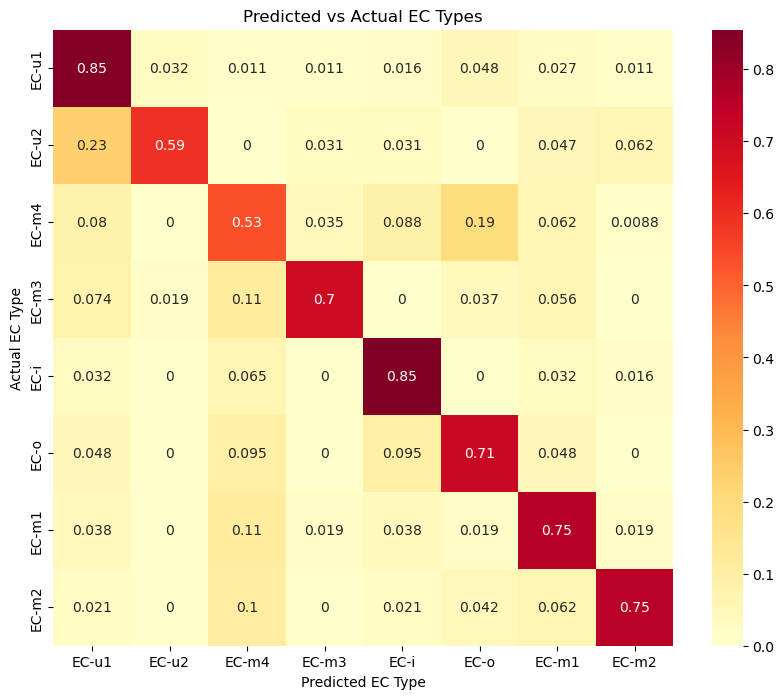

In [23]:
# Need to change EC order according to article

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix

# Load the original data
check = sc.read_h5ad("ECs_allGens_tpm.h5ad")

# Subset the AnnData object to include only common genes
ec_profiles = pd.DataFrame(adata_combined_normalized.X.T, index=adata_combined_normalized.var_names, columns=adata_combined_normalized.obs['ec_name'])
common_genes = check.var_names.intersection(ec_profiles.index)
check = check[:, common_genes]
ec_profiles = ec_profiles.loc[common_genes]

# Compute Spearman correlation for each sample
correlation_results = pd.DataFrame(index=check.obs.index, columns=ec_profiles.columns)

def compute_spearman_correlations(sample_expression, ec_profiles):
    correlations = {}
    for ec_type in ec_profiles.columns:
        ec_expression = ec_profiles[ec_type]
        correlation, _ = spearmanr(sample_expression, ec_expression)
        correlations[ec_type] = correlation
    return correlations

# Iterate over each sample in the check AnnData object
for sample_id in check.obs.index:
    sample_expression = check[sample_id, :].X.flatten()
    correlations = compute_spearman_correlations(sample_expression, ec_profiles)
    for ec_type, correlation in correlations.items():
        correlation_results.loc[sample_id, ec_type] = correlation

# Determine the predicted EC type for each sample
predicted_ec_types = correlation_results.idxmax(axis=1)
print(predicted_ec_types)


# Use the filtered_ec_table directly
filtered_ec_dict = dict(zip(filtered_ec_table['participant_id'], filtered_ec_table['ec_name']))
actual_ec_types = check.obs.index.map(filtered_ec_dict)

# Compute the confusion matrix
conf_matrix = confusion_matrix(actual_ec_types, predicted_ec_types, labels=ec_profiles.columns)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="YlOrRd", xticklabels=ec_profiles.columns, yticklabels=ec_profiles.columns)
plt.xlabel('Predicted EC Type')
plt.ylabel('Actual EC Type')
plt.title('Predicted vs Actual EC Types')
plt.show()

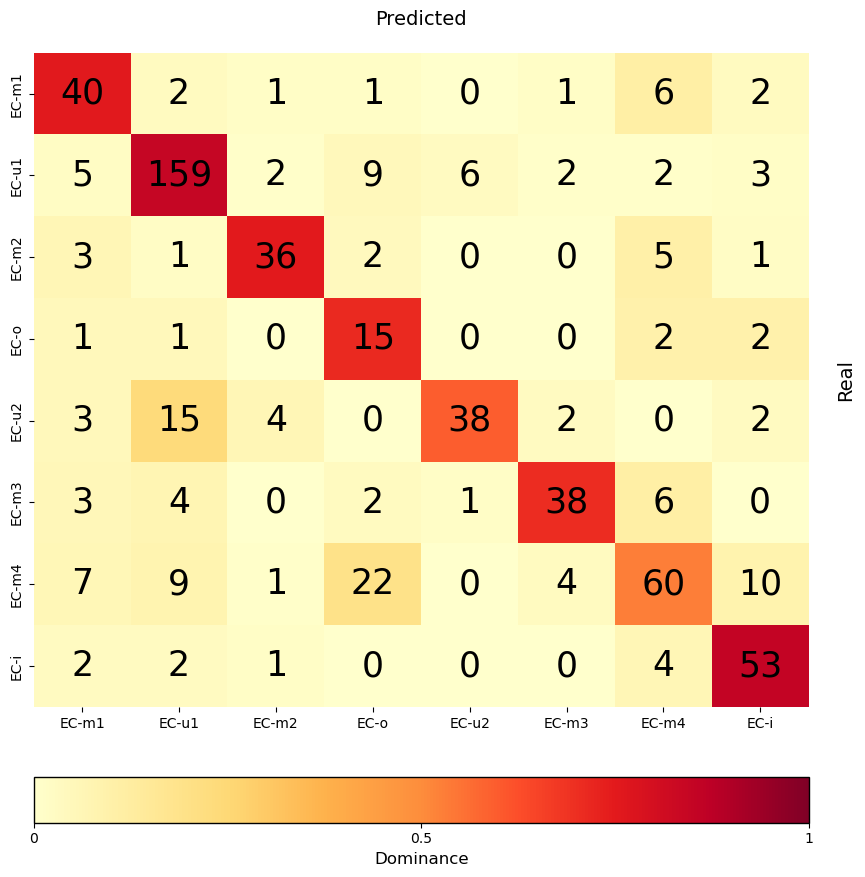

In [24]:
# Load the original data
check = sc.read_h5ad("ECs_allGens_tpm.h5ad")

# Subset the AnnData object to include only common genes
ec_profiles = pd.DataFrame(adata_combined_normalized.X.T, index=adata_combined_normalized.var_names, columns=adata_combined_normalized.obs['ec_name'])
common_genes = check.var_names.intersection(ec_profiles.index)
check = check[:, common_genes]
ec_profiles = ec_profiles.loc[common_genes]

# Compute Spearman correlation for each sample
correlation_results = pd.DataFrame(index=check.obs.index, columns=ec_profiles.columns)

def compute_spearman_correlations(sample_expression, ec_profiles):
    correlations = {}
    for ec_type in ec_profiles.columns:
        ec_expression = ec_profiles[ec_type]
        correlation, _ = spearmanr(sample_expression, ec_expression)
        correlations[ec_type] = correlation
    return correlations

# Iterate over each sample in the check AnnData object
for sample_id in check.obs.index:
    sample_expression = check[sample_id, :].X.flatten()
    correlations = compute_spearman_correlations(sample_expression, ec_profiles)
    for ec_type, correlation in correlations.items():
        correlation_results.loc[sample_id, ec_type] = correlation

# Determine the predicted EC type for each sample
predicted_ec_types = correlation_results.idxmax(axis=1)

# Use the filtered_ec_table directly
filtered_ec_dict = dict(zip(filtered_ec_table['participant_id'], filtered_ec_table['ec_name']))
actual_ec_types = check.obs.index.map(filtered_ec_dict)

# Specify the desired order of EC types
desired_order = ['EC-m1', 'EC-u1', 'EC-m2', 'EC-o', 'EC-u2', 'EC-m3', 'EC-m4', 'EC-i']

# Compute the confusion matrix with the specified order
conf_matrix = confusion_matrix(actual_ec_types, predicted_ec_types, labels=desired_order)

# Compute the normalized confusion matrix for coloring
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap using the normalized values for coloring
plt.figure(figsize=(10, 10))
ax = sns.heatmap(conf_matrix_normalized, cmap="YlOrRd", xticklabels=desired_order, yticklabels=desired_order, annot=False, cbar=False, vmin=0, vmax=1)

# Annotate with raw counts
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=25)

# Add axis labels and title
ax.set_xlabel('Predicted', fontsize=14, labelpad=20)
ax.xaxis.set_label_position('top')
ax.set_ylabel('Real', fontsize=14, labelpad=20)
ax.yaxis.set_label_position('right')

# Create a new axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="7%", pad=0.7)

# Create the color bar
cbar = plt.colorbar(ax.collections[0], cax=cax, orientation="horizontal")
cbar.set_label('Dominance', fontsize=12)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '0.5', '1'])
cbar.ax.tick_params(labelsize=10)

# Draw border around the color bar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1)

plt.show()


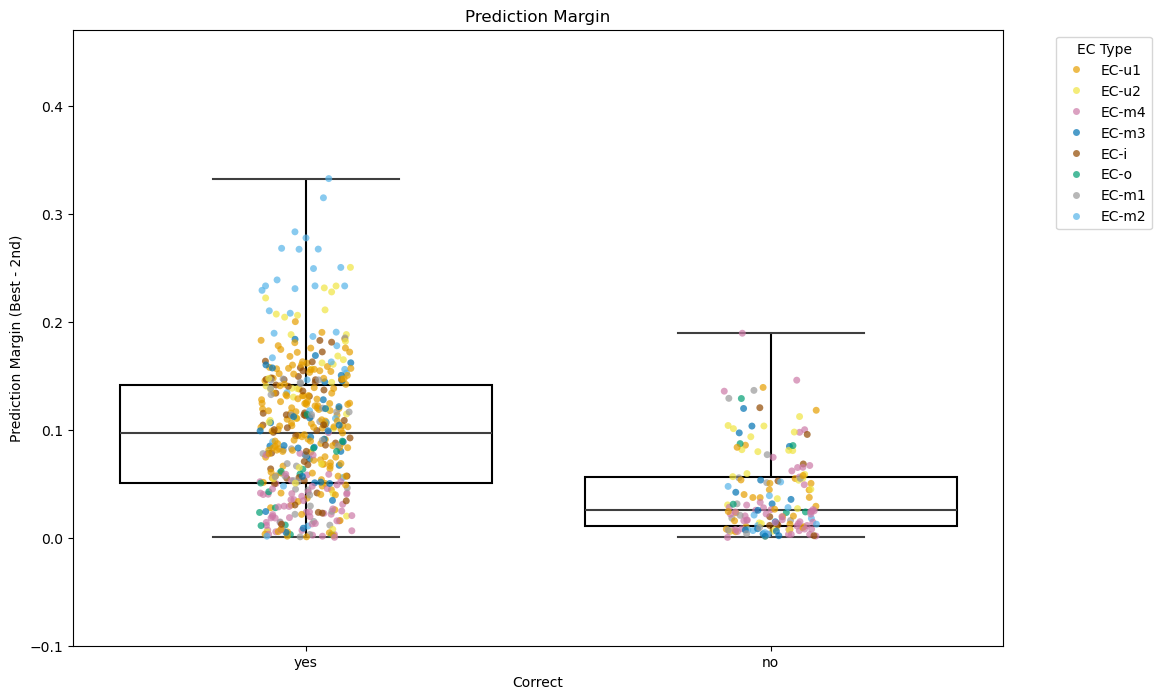

/tmp/ipykernel_2639587/1564244159.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2639587/1564244159.py:127: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/tmp/ipykernel_2639587/1564244159.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2639587/1564244159.py:127: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/tmp/ipykernel_2639587/1564244159.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

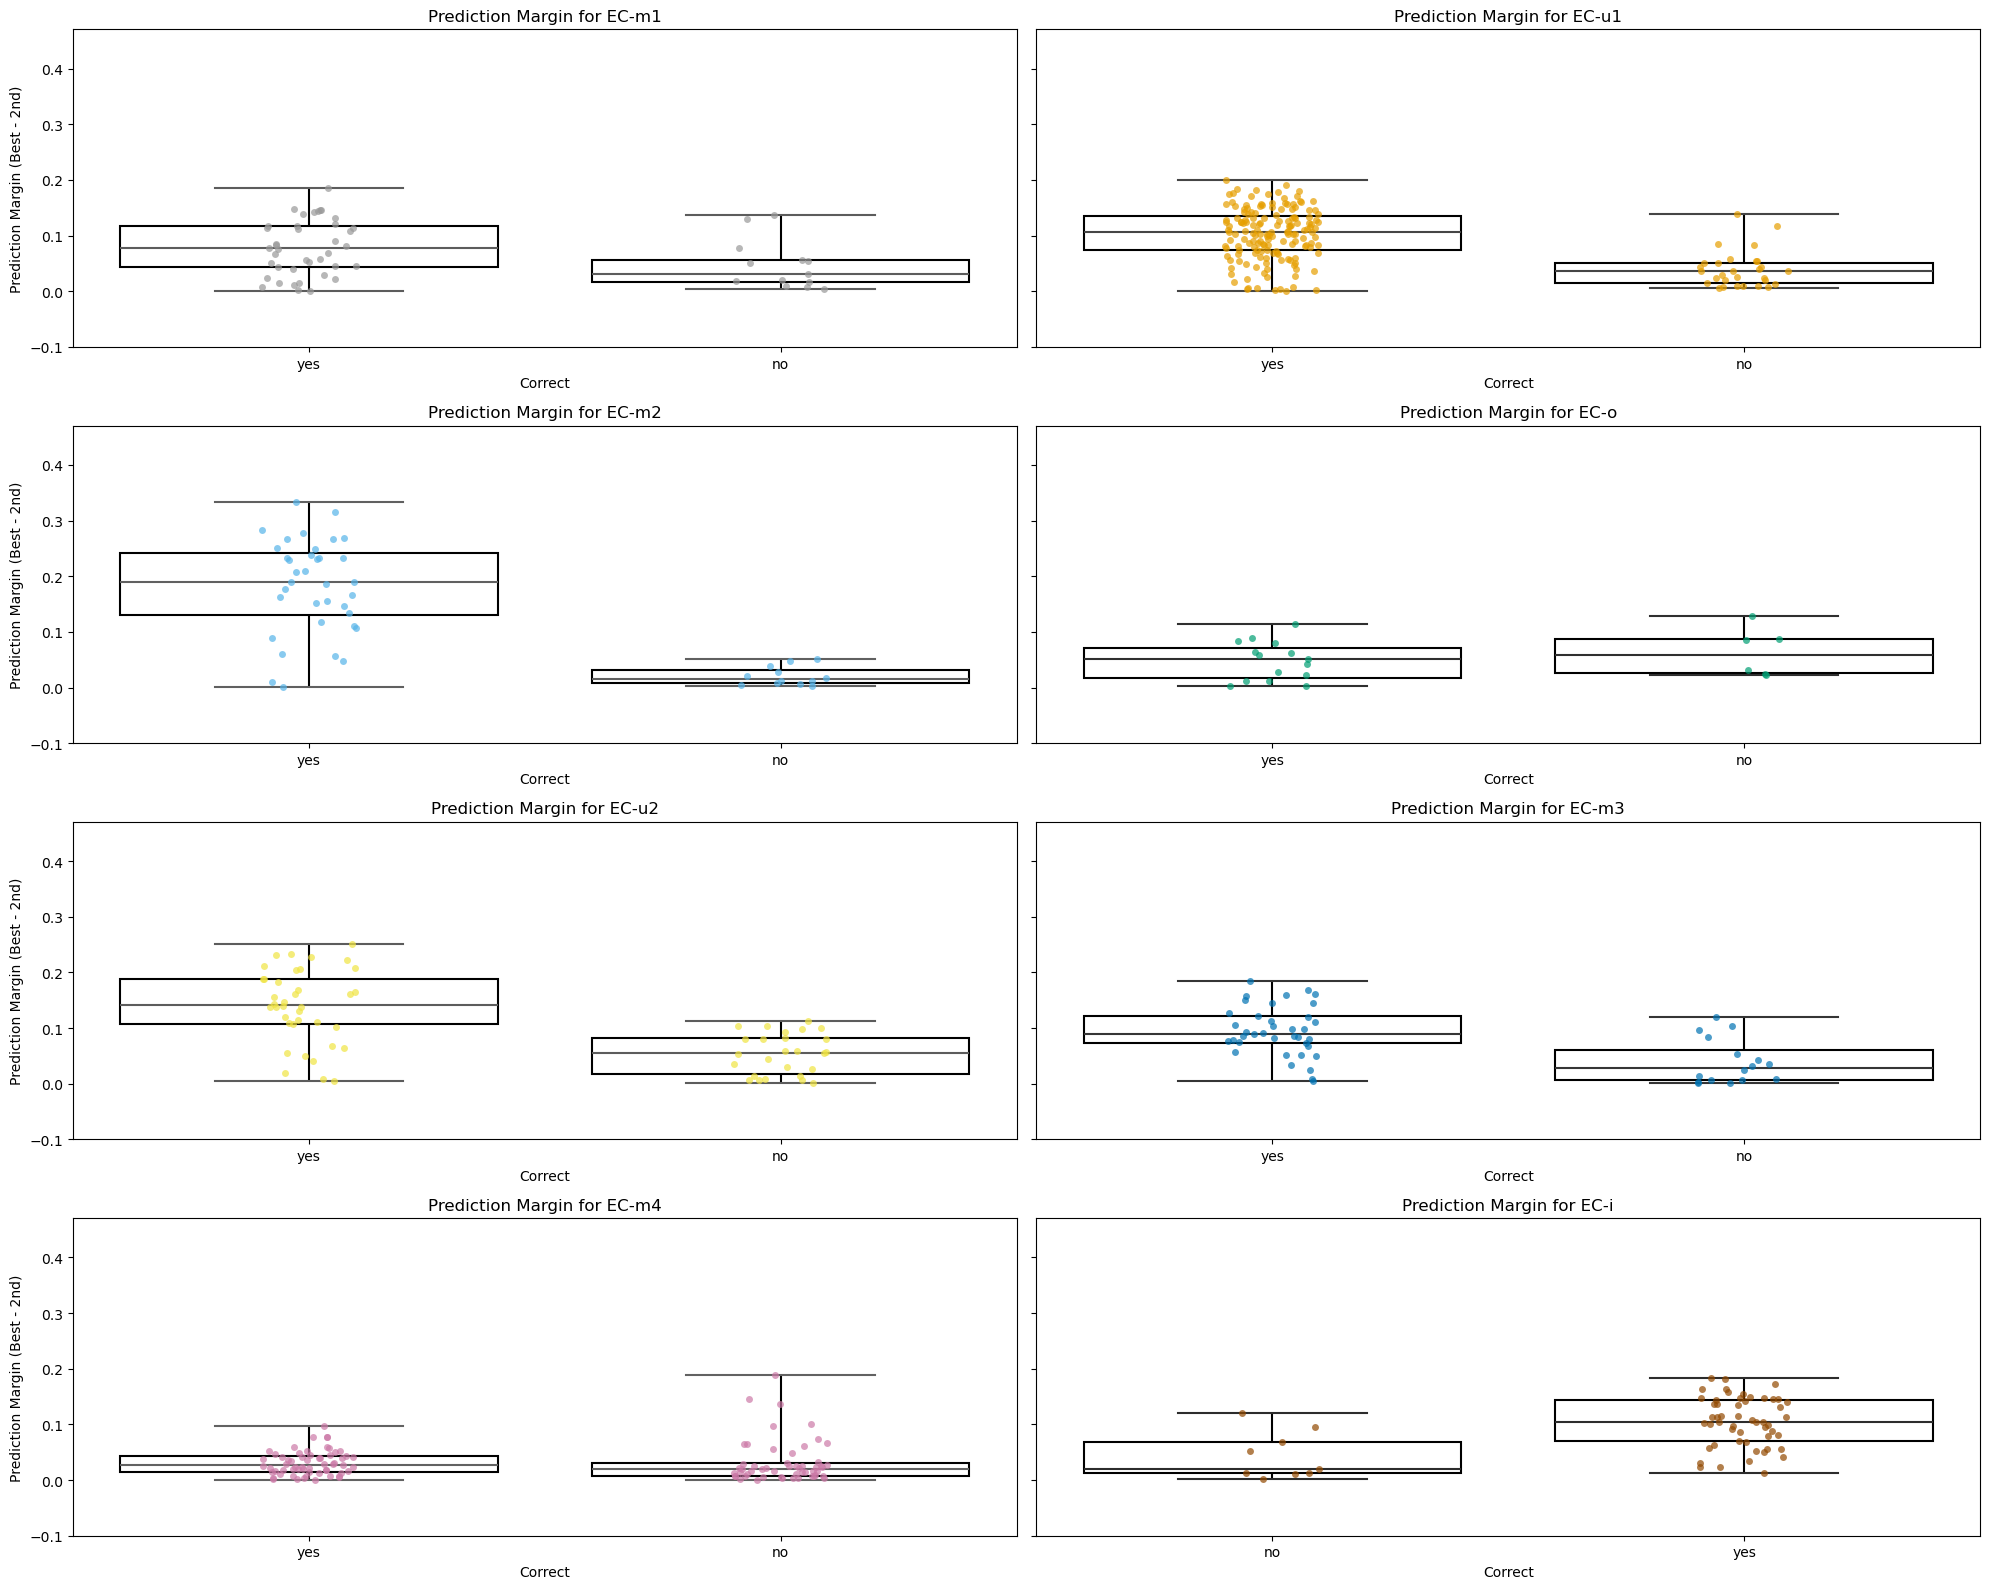

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define individual color lists
IGHV_MUT_COLORS = {"M-CLL": "#361379", "U-CLL": "#E65100"}
EPITYPE_COLORS = {"n-CLL": "#006E93", "i-CLL": "#FDC010", "m-CLL": "#963736"}
EC_NAMES = ["EC-m1", "EC-u1", "EC-m2", "EC-o", "EC-u2", "EC-m3", "EC-m4", "EC-i"]
EC_COLOR_LIST = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#CC79A7", "#924900"]

# Create a dictionary mapping EC names to colors
EC_COLORS = dict(zip(EC_NAMES, EC_COLOR_LIST))

# Combine all dictionaries into a single comprehensive dictionary
ALL_COLORS = {**IGHV_MUT_COLORS, **EPITYPE_COLORS, **EC_COLORS}

# Define the desired order for the columns
desired_order = ["EC-m1", "EC-u1", "EC-m2", "EC-o", "EC-u2", "EC-m3", "EC-m4", "EC-i"]

# Load the original data
check = sc.read_h5ad("ECs_allGens_tpm.h5ad")

# Subset the AnnData object to include only common genes
ec_profiles = pd.DataFrame(adata_combined_normalized.X.T, index=adata_combined_normalized.var_names, columns=adata_combined_normalized.obs['ec_name'])
common_genes = check.var_names.intersection(ec_profiles.index)
check = check[:, common_genes]
ec_profiles = ec_profiles.loc[common_genes]

# Compute Spearman correlation for each sample
correlation_results = pd.DataFrame(index=check.obs.index, columns=ec_profiles.columns)

def compute_spearman_correlations(sample_expression, ec_profiles):
    correlations = {}
    for ec_type in ec_profiles.columns:
        ec_expression = ec_profiles[ec_type]
        correlation, _ = spearmanr(sample_expression, ec_expression)
        correlations[ec_type] = correlation
    return correlations

# Iterate over each sample in the check AnnData object
for sample_id in check.obs.index:
    sample_expression = check[sample_id, :].X.flatten()
    correlations = compute_spearman_correlations(sample_expression, ec_profiles)
    for ec_type, correlation in correlations.items():
        correlation_results.loc[sample_id, ec_type] = correlation

# Determine the predicted EC type for each sample
predicted_ec_types = correlation_results.idxmax(axis=1)

# Use the filtered_ec_table directly
filtered_ec_dict = dict(zip(filtered_ec_table['participant_id'], filtered_ec_table['ec_name']))
actual_ec_types = check.obs.index.map(filtered_ec_dict)

# Ensure all values in correlation_results are numeric
correlation_results = correlation_results.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with a small number to not interfere with nlargest
correlation_results = correlation_results.fillna(-1)

# Create a DataFrame for plotting
df = pd.DataFrame({
    'EC_Type': actual_ec_types,
    'Predicted_EC': predicted_ec_types,
    'Correct': actual_ec_types == predicted_ec_types,
    'Prediction_Margin': correlation_results.max(axis=1) - correlation_results.apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
})

# Convert 'Correct' column to 'yes' and 'no'
df['Correct'] = df['Correct'].map({True: 'yes', False: 'no'})

# Calculate the IQR and determine the appropriate y-axis limits
q1 = df['Prediction_Margin'].quantile(0.25)
q3 = df['Prediction_Margin'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr + 0.2

# Combined box plot with all ECs together
plt.figure(figsize=(12, 8))

# Box plot with outliers and outline color
sns.boxplot(
    x='Correct', 
    y='Prediction_Margin', 
    data=df, 
    order=['yes', 'no'], 
    fliersize=5, 
    linewidth=1.5, 
    showfliers=True, 
    boxprops=dict(facecolor="white", edgecolor='black'), 
    whiskerprops=dict(linewidth=1.5, color='black'),
    whis=[0, 100]  # Adjust this parameter to extend whiskers to the min and max data points
)

# Strip plot to add individual data points
sns.stripplot(
    x='Correct',  # x-axis based on 'Correct' column
    y='Prediction_Margin',  # y-axis based on 'Prediction_Margin' column
    hue='EC_Type',  # Color dots based on 'EC_Type'
    data=df,  # DataFrame containing the data
    palette=EC_COLORS,  # Use the predefined color palette for EC types
    dodge=False,  # Do not separate dots based on hue
    order=['yes', 'no'],  # Order of x-axis categories
    alpha=0.7,  # Transparency of dots
    jitter=True,  # Add jitter to x-axis positions to avoid overlap
    size=5  # Match the size of the outlier points
)

# Set y-axis limit to make the box smaller and focus on the main distribution
plt.ylim(-0.1, upper_bound)

plt.xlabel('Correct')
plt.ylabel('Prediction Margin (Best - 2nd)')
plt.title('Prediction Margin')
plt.legend(title='EC Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Individual box plots for each EC type
fig, axes = plt.subplots(4, 2, figsize=(20, 16), sharey=True)
axes = axes.flatten()

for ax, ec in zip(axes, desired_order):
    sns.boxplot(
        x='Correct', 
        y='Prediction_Margin', 
        data=df[df['EC_Type'] == ec], 
        ax=ax, 
        palette=[EC_COLORS[ec]], 
        fliersize=5, 
        linewidth=1.5, 
        showfliers=True, 
        boxprops=dict(facecolor="white", edgecolor='black'), 
        whiskerprops=dict(linewidth=1.5, color='black'),
        whis=[0, 100]  # Adjust this parameter to extend whiskers to the min and max data points
    )
    sns.stripplot(
        x='Correct', 
        y='Prediction_Margin', 
        data=df[df['EC_Type'] == ec], 
        ax=ax, 
        color=EC_COLORS[ec], 
        dodge=False, 
        alpha=0.7, 
        jitter=True, 
        size=5
    )
    ax.set_ylim(-0.1, upper_bound)
    ax.set_title(f'Prediction Margin for {ec}')
    ax.set_xlabel('Correct')
    ax.set_ylabel('Prediction Margin (Best - 2nd)')

plt.tight_layout()
plt.show()

In [26]:
tpms_603samps_deseqLog10_batchcorr = pd.read_csv(path + "cll_tables/cllmap_rnaseq_tpms_603samps_deseqLog10_batchcorr.tsv", sep="\t")
print(tpms_603samps_deseqLog10_batchcorr.columns)

Index(['Name', 'Description', 'SCLL-0003', 'SCLL-0004', 'SCLL-0005',
       'SCLL-0007', 'SCLL-0008', 'SCLL-0009', 'SCLL-0010', 'SCLL-0012',
       ...
       'GCLL-0176', 'GCLL-0183', 'GCLL-0247', 'GCLL-0248', 'GCLL-0292',
       'GCLL-0296', 'GCLL-0300', 'GCLL-0314', 'JB-0015', 'NHLBI-0053'],
      dtype='object', length=605)


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Provided code
adata_avg_dict = {}

# Step 1: Calculate average expression for each subset
for ec_type, adata_subset in adata_dict.items():
    avg_expression = np.mean(adata_subset.X, axis=0)  # Calculate the average expression for each gene
    avg_expression = avg_expression.reshape(1, -1)  # Reshape to keep 2D structure
    adata_avg = sc.AnnData(X=avg_expression, var=adata_subset.var.copy())  # Create a new AnnData object
    adata_avg.obs['ec_name'] = [ec_type]  # Add EC type to obs
    adata_avg_dict[ec_type] = adata_avg

# Combine the individual AnnData objects into one
adata_combined = sc.concat(adata_avg_dict.values(), join='outer', merge='same')

# Create a DataFrame for easier handling
df = pd.DataFrame(data=adata_combined.X.T, index=adata_combined.var.index, columns=adata_combined.obs['ec_name'])

# Calculate the average TPM across all EC types
avg_tpm = df.mean(axis=1)

# Filter out genes with an average TPM of over 10
filtered_genes = avg_tpm[avg_tpm >= 10].index
df_filtered = df.loc[filtered_genes]

# Ensure all values in df are finite
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Ensure all values in df_filtered are finite
df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered.fillna(0, inplace=True)

# Define the desired order for the columns
desired_order = ["EC-m1", "EC-u1", "EC-m2", "EC-o", "EC-u2", "EC-m3", "EC-m4", "EC-i"]

# Reorder the columns
df = df[desired_order]
df_filtered = df_filtered[desired_order]

# Initialize a dictionary to store upregulated and downregulated genes for each EC
genes_per_ec = {'Up': {}, 'Down': {}}

# For each EC type, find the upregulated and downregulated genes
for ec_type in desired_order:
    ec_data = df_filtered[ec_type]
    up_genes = ec_data[ec_data >= 10].index.tolist()
    down_genes = ec_data[ec_data < 10].index.tolist()
    
    genes_per_ec['Up'][ec_type] = up_genes
    genes_per_ec['Down'][ec_type] = down_genes

# Print the upregulated and downregulated genes for each EC type
for ec_type in desired_order:
    print(f"EC Type: {ec_type}")
    print("Upregulated genes with TPM >= 10:")
    print(genes_per_ec['Up'][ec_type])
    print("Downregulated genes with TPM < 10:")
    print(genes_per_ec['Down'][ec_type])
    print("\n")


EC Type: EC-m1
Upregulated genes with TPM >= 10:
['SH3D21', 'SSBP3', 'C1orf162', 'IGSF3', 'SEMA4A', 'FCRL3', 'FCRL2', 'MNDA', 'FCER1G', 'FMOD', 'AKT3', 'FAM49A', 'MAP4K4', 'FLJ20373', 'COBLL1', 'CTLA4', 'IQSEC1', 'APOD', 'BANK1', 'LEF1', 'TBC1D9', 'DCLK2', 'BASP1', 'TCF7', 'ADTRP', 'MYLIP', 'MBOAT1', 'AEBP1', 'TFEC', 'CNTNAP2', 'KCNH2', 'MYBL1', 'PIP5K1B', 'LCN10', 'DUSP5', 'FADS3', 'SESN3', 'PDGFD', 'SLC2A3', 'RIMKLB', 'LRRK2', 'NXPH4', 'HRK', 'HIP1R', 'VPS37B', 'GPR183', 'VASH1', 'ACSM3', 'ITGAX', 'P2RX1', 'TNFRSF13B', 'TUBG2', 'WNT3', 'ABCA9', 'MYL9', 'SAMSN1', 'APP', 'SIK1', 'COL18A1', 'CYBB', 'MID1IP1', 'PHF16', 'ZMAT1', 'BEX4']
Downregulated genes with TPM < 10:
['CD1C', 'EML6', 'TSPAN13', 'MS4A4E', 'KLRK1', 'BCL7A', 'PITPNC1', 'CEACAM1', 'HCK', 'TOX2']


EC Type: EC-u1
Upregulated genes with TPM >= 10:
['SH3D21', 'C1orf162', 'IGSF3', 'SEMA4A', 'FCRL3', 'FCRL2', 'MNDA', 'FCER1G', 'FMOD', 'FAM49A', 'MAP4K4', 'FLJ20373', 'COBLL1', 'CTLA4', 'IQSEC1', 'APOD', 'BANK1', 'LEF1', 'TBC1D9

/data01/home/ls/sarahl/miniforge3/envs/proj/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
